本代码用于初步的数据清洗，遇到缺失值移除那一行，通过IOR来检测异常值（IQR方法的基本原理： 任何值低于 Q1 - 1.5 * IQR 或高于 Q3 + 1.5 * IQR 的数据点都被认为是异常值）然后直接移除

数据加载成功！

数据前5行：
        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   销售日期        878503 non-null  datetime64[ns]
 1   扫码销售时间      878503 non-null  object        
 2   单品编码        878503 non-null  int64         
 3   销量(千克)      878503 non-null  float64       
 4   销售单价(元/千克)  878503 non-null  float64       
 5   销售类型        878503 non-null  object        
 6   是否打折销售      

C:\Users\gongchencan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gongchencan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gongchencan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gongchencan\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gongchencan\AppData\Roaming\Python\Python39\site-packages\I

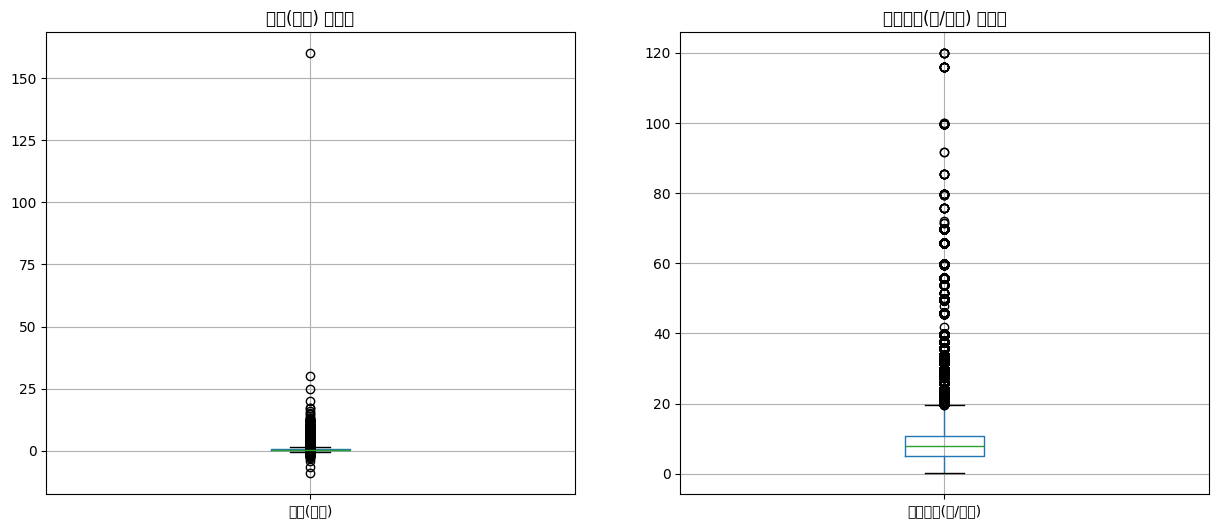


销量(千克) 列异常值处理前后的数据量：878503 -> 867635

销售单价(元/千克) 列异常值处理前后的数据量：867635 -> 805313

最终清洗后的数据：
        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否

清洗后的数据已成功保存到 附件2-销售流水明细_cleaned.xlsx

最终清洗后的数据：
        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
4 2020-07-01  09:20:23.6

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import numbers

# 加载Excel文件
try:
    df_sales = pd.read_excel('附件2.xlsx')
    print("数据加载成功！")
except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 查看前5行数据
print("\n数据前5行：")
print(df_sales.head())

# 查看数据的基本信息，包括列名、非空值数量和数据类型
print("\n数据基本信息：")
df_sales.info()


# 检查每列的缺失值数量
print("\n每列的缺失值数量：")
print(df_sales.isnull().sum())

# 针对缺失值的处理策略
# 假设'销售单价(元/kg)'或'商品名称'等核心列存在缺失，我们可能需要删除这些行
# 这里的'商品名称'和'销售单价(元/kg)'只是举例，你需要根据实际数据情况来决定
# 例如，删除任何包含缺失值的行：
df_sales_cleaned = df_sales.dropna(how='any')

# 或者，如果缺失值是数值型，可以用均值、中位数或众数填充
# 例如，用'销售数量(kg)'的均值填充缺失值
# df_sales['销售数量(kg)'] = df_sales['销售数量(kg)'].fillna(df_sales['销售数量(kg)'].mean())

print("\n处理缺失值后的数据基本信息：")
df_sales_cleaned.info()

# 绘制箱线图来直观观察异常值
# 这里假设'销售数量(kg)'和'销售单价(元/kg)'是可能存在异常值的列
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
df_sales_cleaned.boxplot(column='销量(千克)')
plt.title('销量(千克) 箱线图')

plt.subplot(1, 2, 2)
df_sales_cleaned.boxplot(column='销售单价(元/千克)')
plt.title('销售单价(元/千克) 箱线图')
plt.show()

# 使用IQR方法检测并处理异常值
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 筛选掉异常值
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"\n{column} 列异常值处理前后的数据量：{len(df)} -> {len(df_filtered)}")
    return df_filtered

# 对'销售数量(kg)'和'销售单价(元/kg)'进行异常值处理
df_sales_cleaned = remove_outliers_iqr(df_sales_cleaned, '销量(千克)')
df_sales_cleaned = remove_outliers_iqr(df_sales_cleaned, '销售单价(元/千克)')

# 最终清洗后的数据
print("\n最终清洗后的数据：")
print(df_sales_cleaned.head())

# 保存清洗后的数据到一个新文件
output_file_path = '附件2-销售流水明细_cleaned.xlsx'
df_sales_cleaned.to_excel(output_file_path, index=False)

print(f"\n清洗后的数据已成功保存到 {output_file_path}")

# 最终清洗后的数据
print("\n最终清洗后的数据：")
print(df_sales_cleaned.head())
# --- 你的代码到这里结束 ---

# *** 以下是解决单品编号格式问题的代码 ***


# 设置保存路径
output_file_path = '附件2-销售流水明细_cleaned.xlsx'

# 创建一个新的Excel工作簿对象
wb = openpyxl.Workbook()
ws = wb.active

# 将清洗后的DataFrame数据写入工作表
for row in dataframe_to_rows(df_sales_cleaned, index=False, header=True):
    ws.append(row)

# 找到“单品编号”列的索引
try:
    # 假设 '单品编号' 是列名
    header = [cell.value for cell in ws[1]]
    product_id_col_index = header.index('单品编号') + 1 # openpyxl 的列索引从1开始
except ValueError:
    print("在数据中未找到名为 '单品编号' 的列，请检查列名是否正确。")
    product_id_col_index = None

# 如果找到了“单品编号”列，则将其格式设置为文本
if product_id_col_index:
    # 遍历该列的所有单元格，并设置其格式为文本
    # ws.iter_cols() 方法用于按列遍历
    for cell in ws.iter_cols(min_col=product_id_col_index, max_col=product_id_col_index, min_row=2):
        for cell_obj in cell:
            cell_obj.number_format = numbers.FORMAT_TEXT

# 保存文件
wb.save(output_file_path)

print(f"\n清洗后的数据已成功保存到 {output_file_path}，单品编号列已设置为文本格式。")



In [2]:
import pandas as pd

# 1. 加载附件1和附件2的数据

try:
    # 加载附件1，其中包含商品信息和品类信息
    df_attachment1 = pd.read_excel('附件1.xlsx')
    print("附件1数据加载成功！")
    print("\n附件1数据前5行：")
    print(df_attachment1.head())
    print("-" * 50)
    
    # 加载附件2，其中包含销售流水明细
    # 注意：这里我们使用你已经清洗好的文件，以确保数据质量
    # 如果你还没有生成这个文件，请将文件名改为 '附件2.xlsx'
    df_attachment2 = pd.read_excel('附件2-销售流水明细_cleaned.xlsx')
    print("附件2数据加载成功！")
    print("\n附件2数据前5行：")
    print(df_attachment2.head())
    print("-" * 50)

except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 2. 数据预处理 - 确保用于匹配的列数据类型一致

# 检查附件1中的'单品编码'列的数据类型
print("附件1中'单品编码'列的数据类型：", df_attachment1['单品编码'].dtype)
# 检查附件2中的'单品编码'列的数据类型
print("附件2中'单品编码'列的数据类型：", df_attachment2['单品编码'].dtype)
print("-" * 50)

# 如果两列的数据类型不一致，例如一个为数字，一个为字符串，需要进行转换
# 附件1中的'单品编码'可能是一个长串数字，Excel可能将其读为浮点数
# 附件2中的'单品编码'也可能被读为浮点数，我们可以将其转换为整数或字符串
# 这里统一将两列都转换为字符串类型，以确保准确匹配
df_attachment1['单品编码'] = df_attachment1['单品编码'].astype(str)
df_attachment2['单品编码'] = df_attachment2['单品编码'].astype(str)

print("已将两份文件中'单品编码'列的数据类型统一转换为字符串。")
print("-" * 50)


# 3. 使用pd.merge()函数进行数据整合

# 使用左连接（left merge）的方式，将附件1的品类信息合并到附件2的销售明细中
# on='单品编码' 指定了两个DataFrame的共同列
# how='left' 表示保留所有附件2（左表）中的数据，只将附件1（右表）中匹配到的信息合并过来
df_merged = pd.merge(df_attachment2, df_attachment1[['单品编码', '分类名称']], on='单品编码', how='left')

# 查看整合后的数据前5行，验证是否成功添加了'商品分类名称'列
print("数据整合成功！合并后的数据前5行：")
print(df_merged.head())
print("-" * 50)

# 查看整合后的数据基本信息，确认没有因为合并而产生缺失值（如果附件2中的单品编码都在附件1中）
print("合并后的数据基本信息：")
df_merged.info()
print("-" * 50)


# 4. 保存整合后的数据到一个新文件

output_file_path = '含品类的销售流水明细.xlsx'

# 将整合后的数据保存为新的Excel文件
# index=False 表示不保存DataFrame的索引
df_merged.to_excel(output_file_path, index=False)

print(f"整合后的数据已成功保存到 {output_file_path}")

附件1数据加载成功！

附件1数据前5行：
              单品编码    单品名称        分类编码 分类名称
0  102900005115168    牛首生菜  1011010101  花叶类
1  102900005115199   四川红香椿  1011010101  花叶类
2  102900005115625  本地小毛白菜  1011010101  花叶类
3  102900005115748     白菜苔  1011010101  花叶类
4  102900005115762      苋菜  1011010101  花叶类
--------------------------------------------------
附件2数据加载成功！

附件2数据前5行：
        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否
--------------------------------------------------
附件1中'单品编码'列的数据类型： int64
附件2中'单品编码'列的数据类型： int64
--------------------------------------------------
已将两份文件中'单品编码'列的数据类型统一转换为字符串。
------

整合后的数据加载成功！

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805313 entries, 0 to 805312
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   销售日期        805313 non-null  datetime64[ns]
 1   扫码销售时间      805313 non-null  object        
 2   单品编码        805313 non-null  int64         
 3   销量(千克)      805313 non-null  float64       
 4   销售单价(元/千克)  805313 non-null  float64       
 5   销售类型        805313 non-null  object        
 6   是否打折销售      805313 non-null  object        
 7   分类名称        805313 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 49.2+ MB
--------------------------------------------------


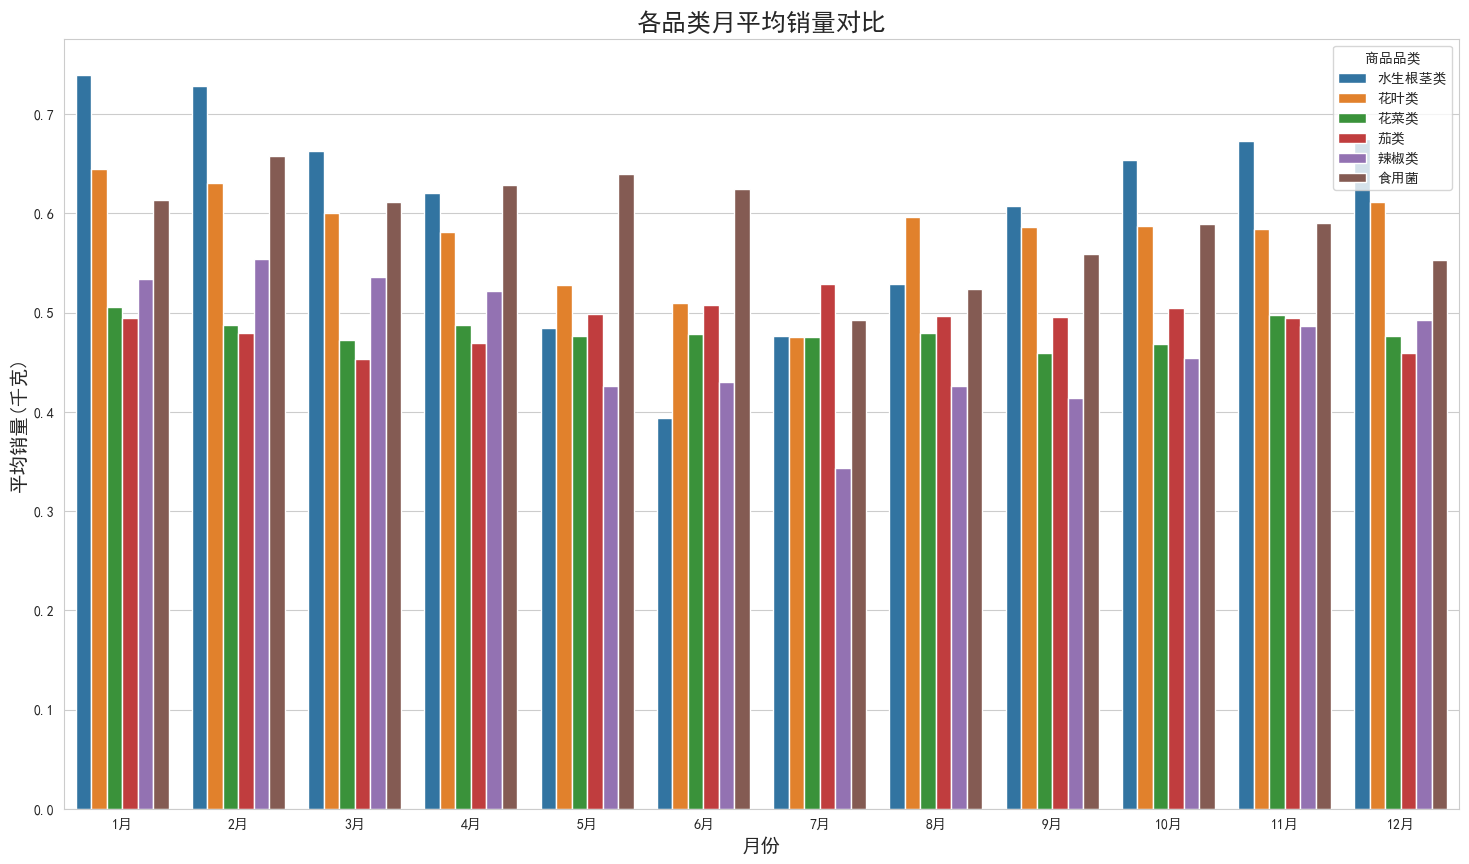

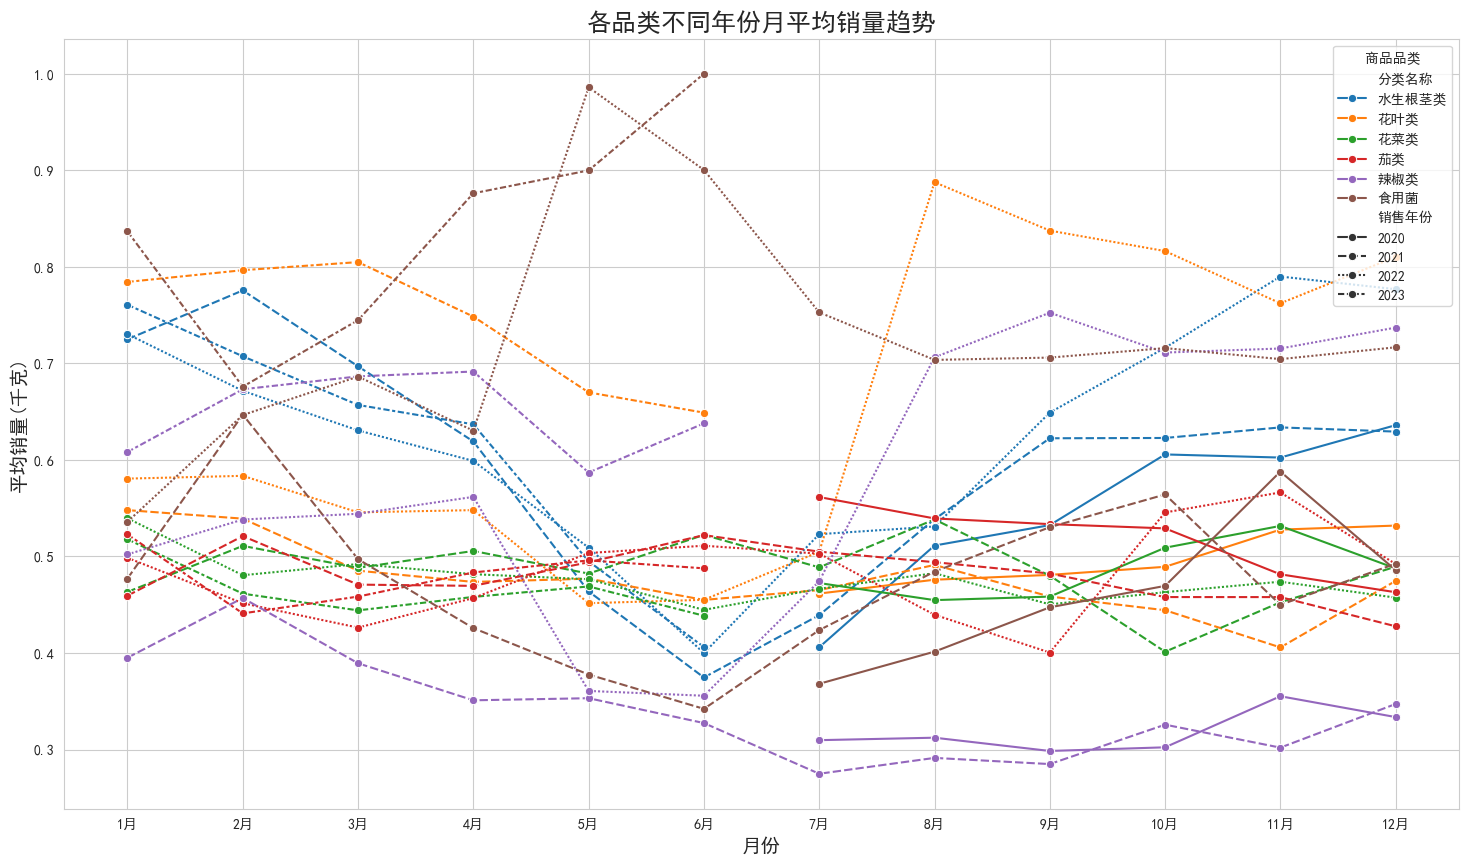

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取整合好的数据
try:
    df_merged = pd.read_excel('含品类的销售流水明细.xlsx')
    print("整合后的数据加载成功！")
except FileNotFoundError:
    print("未找到文件 '整合后的销售流水明细.xlsx'，请先运行数据整合代码。")
    exit()

# 确保 '销售日期' 列为日期类型
df_merged['销售日期'] = pd.to_datetime(df_merged['销售日期'])
print("\n数据基本信息：")
df_merged.info()
print("-" * 50)

# 2. 特征工程：提取月份和年份
df_merged['销售年份'] = df_merged['销售日期'].dt.year
df_merged['销售月份'] = df_merged['销售日期'].dt.month

# 3. 数据分析与可视化：按月份分析销量

# 按'商品分类名称'和'销售月份'进行分组，计算平均销量
df_monthly_sales = df_merged.groupby(['分类名称', '销售月份'])['销量(千克)'].mean().reset_index()

# 绘制各品类在不同月份的平均销量柱状图
plt.figure(figsize=(18, 10))
sns.barplot(data=df_monthly_sales, x='销售月份', y='销量(千克)', hue='分类名称')
plt.title('各品类月平均销量对比', fontsize=18)
plt.xlabel('月份', fontsize=14)
plt.ylabel('平均销量(千克)', fontsize=14)
plt.xticks(ticks=range(12), labels=[str(i+1) + '月' for i in range(12)])
plt.legend(title='商品品类')
plt.show()

# 如果想看每年月份的趋势，可以按年和月分组
df_yearly_monthly_sales = df_merged.groupby(['分类名称', '销售年份', '销售月份'])['销量(千克)'].mean().reset_index()

# 绘制各品类不同年份的月平均销量折线图
plt.figure(figsize=(18, 10))
sns.lineplot(data=df_yearly_monthly_sales, x='销售月份', y='销量(千克)', hue='分类名称', style='销售年份', marker='o')
plt.title('各品类不同年份月平均销量趋势', fontsize=18)
plt.xlabel('月份', fontsize=14)
plt.ylabel('平均销量(千克)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[str(i) + '月' for i in range(1, 13)])
plt.legend(title='商品品类')
plt.show()

In [2]:
import pandas as pd
from scipy import stats

# 1. 读取数据
try:
    # 附件名为“含品类的销售流水明细”
    # 将 read_csv 修改为 read_excel，并指定文件名为 .xlsx
    df = pd.read_excel('含品类的销售流水明细.xlsx')
    print("数据读取成功！")
except FileNotFoundError:
    print("错误：未找到文件 '含品类的销售流水明细.xlsx'。请检查文件路径和文件名。")
    exit()

# 2. 数据预处理
# 筛选出 '水生根茎类' 的数据
df_radix = df[df['分类名称'] == '水生根茎类'].copy()
if df_radix.empty:
    print("错误：数据中没有 '水生根茎类' 的记录。请检查分类名称是否正确。")
    exit()

# 将销量数据分为打折组和未打折组
sales_discounted = df_radix[df_radix['是否打折销售'] == '是']['销量(千克)']
sales_undiscounted = df_radix[df_radix['是否打折销售'] == '否']['销量(千克)']

# 检查分组后数据是否为空
if sales_discounted.empty or sales_undiscounted.empty:
    print("警告：打折组或未打折组的数据为空。无法进行检验。")
    exit()

print(f"打折组样本量：{len(sales_discounted)}")
print(f"未打折组样本量：{len(sales_undiscounted)}")

# 3. 正态性检验 (Kolmogorov-Smirnov)
# 样本量大时，Kolmogorov-Smirnov 检验是更好的选择
print("\n--- 进行正态性检验（Kolmogorov-Smirnov） ---")

# K-S 检验打折组
# stats.norm.fit() 用于拟合正态分布的均值和标准差
mean_discounted, std_discounted = stats.norm.fit(sales_discounted)
ks_stat_discounted, ks_p_discounted = stats.kstest(sales_discounted, 'norm', args=(mean_discounted, std_discounted))
print(f"打折组销量 K-S 统计量: {ks_stat_discounted:.4f}, p-value: {ks_p_discounted:.4f}")

# K-S 检验未打折组
mean_undiscounted, std_undiscounted = stats.norm.fit(sales_undiscounted)
ks_stat_undiscounted, ks_p_undiscounted = stats.kstest(sales_undiscounted, 'norm', args=(mean_undiscounted, std_undiscounted))
print(f"未打折组销量 K-S 统计量: {ks_stat_undiscounted:.4f}, p-value: {ks_p_undiscounted:.4f}")

# 解读正态性检验结果
is_normal_discounted = ks_p_discounted > 0.05
is_normal_undiscounted = ks_p_undiscounted > 0.05

if is_normal_discounted and is_normal_undiscounted:
    print("\n结论：两组数据都服从正态分布。")
    perform_levene = True
else:
    print("\n结论：至少有一组数据不服从正态分布。不满足 t-检验的前提。")
    print("建议：请使用非参数检验，例如 Wilcoxon 秩和检验。")
    perform_levene = False

# 4. 方差齐性检验 (Levene's test)
if perform_levene:
    print("\n--- 进行方差齐性检验（Levene's test） ---")
    stat_levene, p_levene = stats.levene(sales_discounted, sales_undiscounted)
    print(f"Levene 统计量: {stat_levene:.4f}, p-value: {p_levene:.4f}")

    # 解读方差齐性检验结果
    if p_levene > 0.05:
        print("\n结论：两组数据的方差相等（方差齐性）。可以使用独立样本 t-检验。")
        # 您可以在这里添加 t-检验的代码
        # stats.ttest_ind(sales_discounted, sales_undiscounted, equal_var=True)
    else:
        print("\n结论：两组数据的方差不相等（方差不齐）。应使用 Welch's t-检验。")
        # 您可以在这里添加 Welch's t-检验的代码
        # stats.ttest_ind(sales_discounted, sales_undiscounted, equal_var=False)

数据读取成功！
打折组样本量：5586
未打折组样本量：46622

--- 进行正态性检验（Kolmogorov-Smirnov） ---
打折组销量 K-S 统计量: 0.1047, p-value: 0.0000
未打折组销量 K-S 统计量: 0.1054, p-value: 0.0000

结论：至少有一组数据不服从正态分布。不满足 t-检验的前提。
建议：请使用非参数检验，例如 Wilcoxon 秩和检验。


整合后的数据加载成功！

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805313 entries, 0 to 805312
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   销售日期        805313 non-null  datetime64[ns]
 1   扫码销售时间      805313 non-null  object        
 2   单品编码        805313 non-null  int64         
 3   销量(千克)      805313 non-null  float64       
 4   销售单价(元/千克)  805313 non-null  float64       
 5   销售类型        805313 non-null  object        
 6   是否打折销售      805313 non-null  category      
 7   分类名称        805313 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 43.8+ MB
--------------------------------------------------


C:\Users\gongchencan\AppData\Local\Temp\ipykernel_6364\632222986.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_sales = df_merged.groupby(['分类名称', '是否打折销售'])['销量(千克)'].agg(['mean', 'median', 'std']).reset_index()


打折与否对各品类销量的描述性统计结果：
     分类名称 是否打折销售      mean  median       std
0   水生根茎类      否  0.634671   0.564  0.300998
1   水生根茎类      是  0.593144   0.518  0.301471
2     花叶类      否  0.562109   0.476  0.285760
3     花叶类      是  0.800438   1.000  0.291545
4     花菜类      否  0.480591   0.435  0.182795
5     花菜类      是  0.476477   0.441  0.174768
6      茄类      否  0.493127   0.460  0.205762
7      茄类      是  0.512457   0.489  0.205045
8     辣椒类      否  0.452870   0.357  0.299909
9     辣椒类      是  0.746865   1.000  0.332625
10    食用菌      否  0.584064   0.441  0.357637
11    食用菌      是  0.649455   1.000  0.369757
--------------------------------------------------


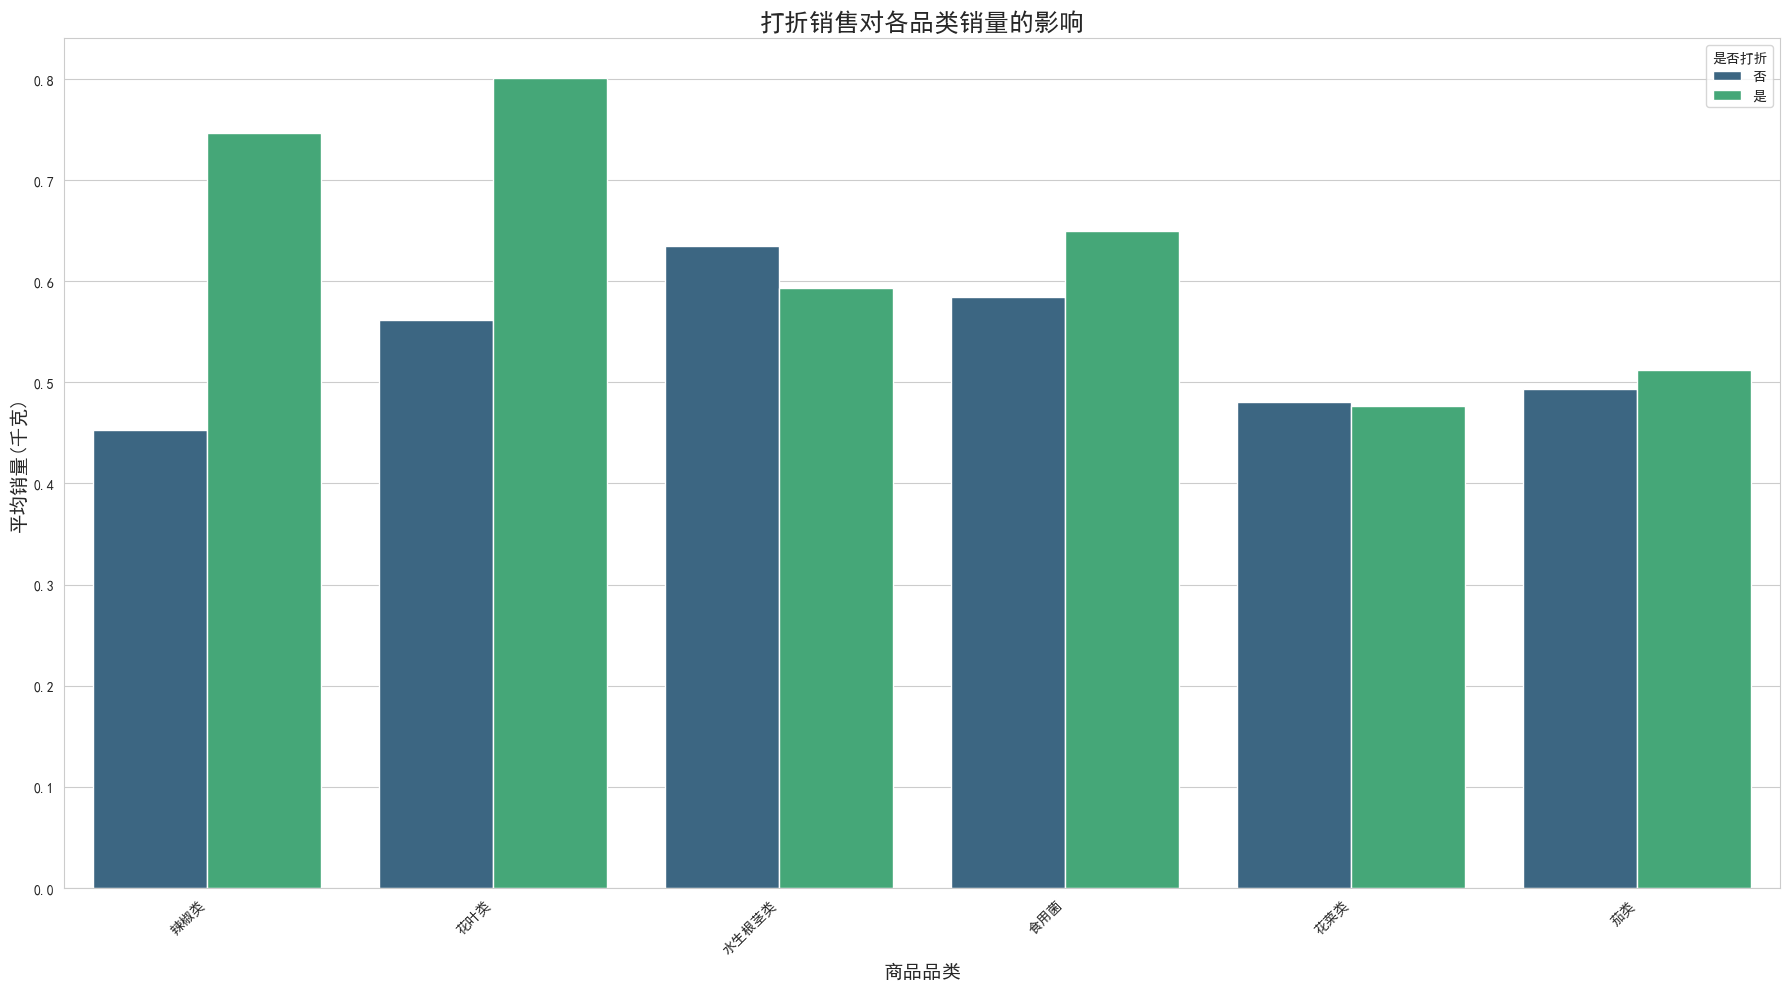


--- 水生根茎类销量打折与否的Wilcoxon秩和检验结果 ---
打折组平均销量: 0.59 千克
未打折组平均销量: 0.63 千克
Wilcoxon 秩和检验统计量: -10.5553
p值: 0.0000
结论: p值 (0.0000) 小于显著性水平 (0.05), 我们可以拒绝原假设。
这意味着打折对水生根茎类的销量有显著影响。


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取整合好的数据
try:
    df_merged = pd.read_excel('含品类的销售流水明细.xlsx')
    print("整合后的数据加载成功！")
except FileNotFoundError:
    print("未找到文件 '整合后的销售流水明细.xlsx'，请先运行数据整合代码。")
    exit()

# 确保 '销售日期' 为日期类型
df_merged['销售日期'] = pd.to_datetime(df_merged['销售日期'])
# 确保 '是否打折销售' 为类别类型，方便分组
df_merged['是否打折销售'] = df_merged['是否打折销售'].astype('category')
print("\n数据基本信息：")
df_merged.info()
print("-" * 50)

# 2. 数据分组与描述性统计
# 按 '商品分类名称' 和 '是否打折销售' 进行分组，计算平均销量、标准差等
df_grouped_sales = df_merged.groupby(['分类名称', '是否打折销售'])['销量(千克)'].agg(['mean', 'median', 'std']).reset_index()

print("打折与否对各品类销量的描述性统计结果：")
print(df_grouped_sales)
print("-" * 50)

# 3. 数据可视化：绘制柱状图进行直观对比
plt.figure(figsize=(18, 10))
sns.barplot(data=df_merged, x='分类名称', y='销量(千克)', hue='是否打折销售', errorbar=None, palette='viridis')
plt.title('打折销售对各品类销量的影响', fontsize=18)
plt.xlabel('商品品类', fontsize=14)
plt.ylabel('平均销量(千克)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='是否打折')
plt.tight_layout()
plt.show()

# 4. 统计检验（可选但推荐）
# 这里我们以 '根茎类' 为例进行Wilcoxon秩和检验，以判断打折是否对该品类销量有显著影响
from scipy import stats

# 筛选出根茎类数据
df_root_vegetables = df_merged[df_merged['分类名称'] == '水生根茎类']
# 分别获取打折和未打折的销量数据
sales_discounted = df_root_vegetables[df_root_vegetables['是否打折销售'] == '是']['销量(千克)']
sales_not_discounted = df_root_vegetables[df_root_vegetables['是否打折销售'] == '否']['销量(千克)']

# 进行Wilcoxon秩和检验
# 该方法适用于非正态分布的两组独立样本
statistic, p_value = stats.ranksums(sales_discounted, sales_not_discounted)

print("\n--- 水生根茎类销量打折与否的Wilcoxon秩和检验结果 ---")
print(f"打折组平均销量: {sales_discounted.mean():.2f} 千克")
print(f"未打折组平均销量: {sales_not_discounted.mean():.2f} 千克")
print(f"Wilcoxon 秩和检验统计量: {statistic:.4f}")
print(f"p值: {p_value:.4f}")

# 根据p值进行结论判断
alpha = 0.05
if p_value < alpha:
    print(f"结论: p值 ({p_value:.4f}) 小于显著性水平 ({alpha}), 我们可以拒绝原假设。\n这意味着打折对水生根茎类的销量有显著影响。")
else:
    print(f"结论: p值 ({p_value:.4f}) 大于显著性水平 ({alpha}), 我们不能拒绝原假设。\n这意味着打折对水生根茎类的销量没有显著影响。")

整合后的数据加载成功！
每日各品类总销量数据（前5行）：
分类名称        水生根茎类      花叶类     花菜类      茄类     辣椒类     食用菌
销售日期                                                      
2020-07-01  4.119  203.848  47.076  33.942  72.332  35.365
2020-07-02  4.342  196.362  43.943  32.199  60.122  31.165
2020-07-03  9.572  191.779  42.076  35.896  60.318  27.152
2020-07-04  3.107  234.805  55.662  52.552  77.861  33.168
2020-07-05  4.019  220.612  55.474  58.097  94.797  54.807
--------------------------------------------------
各品类销售量斯皮尔曼相关性矩阵：
分类名称      水生根茎类       花叶类       花菜类        茄类       辣椒类       食用菌
分类名称                                                             
水生根茎类  1.000000  0.348841  0.367065 -0.211339  0.264366  0.581313
花叶类    0.348841  1.000000  0.610774  0.307161  0.660502  0.442335
花菜类    0.367065  0.610774  1.000000  0.207184  0.427715  0.415934
茄类    -0.211339  0.307161  0.207184  1.000000  0.103524 -0.180914
辣椒类    0.264366  0.660502  0.427715  0.103524  1.000000  0.472104
食用菌    0.581313  0.442335  0

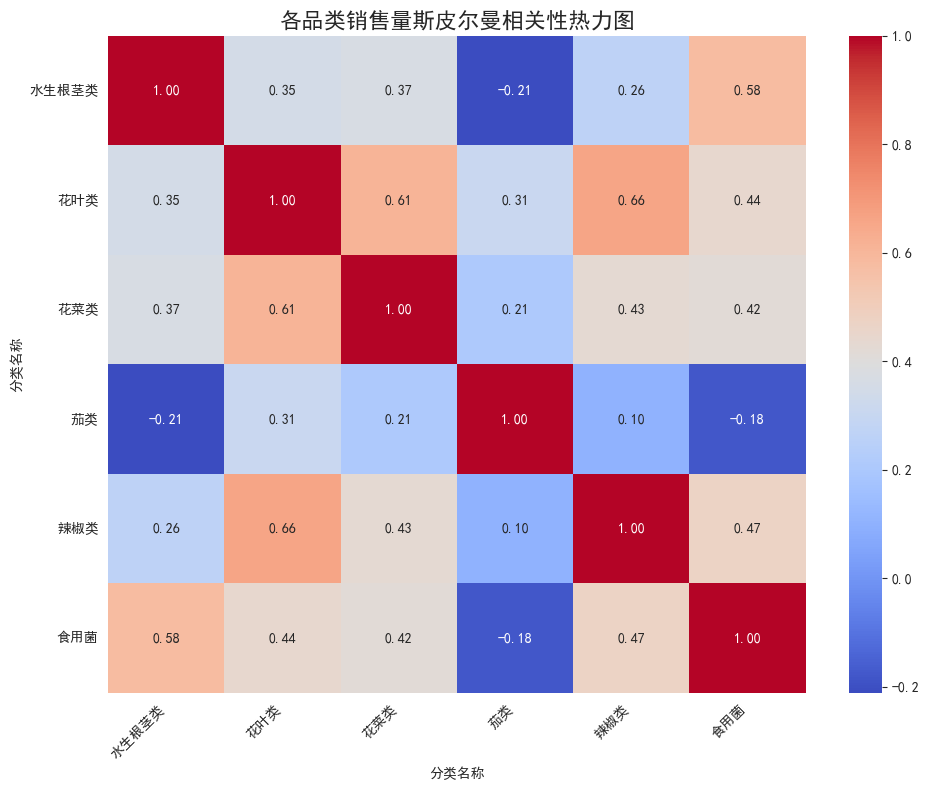

斯皮尔曼相关性热力图已生成。
各品类销售量皮尔逊相关性矩阵：
分类名称      水生根茎类       花叶类       花菜类        茄类       辣椒类       食用菌
分类名称                                                             
水生根茎类  1.000000  0.485671  0.482322  0.049393  0.506680  0.676926
花叶类    0.485671  1.000000  0.604934  0.283088  0.733443  0.541349
花菜类    0.482322  0.604934  1.000000  0.308678  0.527410  0.477988
茄类     0.049393  0.283088  0.308678  1.000000  0.199692  0.015688
辣椒类    0.506680  0.733443  0.527410  0.199692  1.000000  0.627653
食用菌    0.676926  0.541349  0.477988  0.015688  0.627653  1.000000
--------------------------------------------------


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取整合好的数据
try:
    df_merged = pd.read_excel('含品类的销售流水明细.xlsx')
    print("整合后的数据加载成功！")
except FileNotFoundError:
    print("未找到文件 '含品类的销售流水明细.xlsx'，请先运行数据整合代码。")
    exit()

# 确保 '销售日期' 列为日期类型
df_merged['销售日期'] = pd.to_datetime(df_merged['销售日期'])

# 2. 数据聚合：按日期和品类计算每日销量
# 使用pivot_table将数据转换为宽格式
df_daily_sales = df_merged.pivot_table(
    index='销售日期',
    columns='分类名称',
    values='销量(千克)',
    aggfunc='sum'
).fillna(0) # 填充没有销量的日期为0

print("每日各品类总销量数据（前5行）：")
print(df_daily_sales.head())
print("-" * 50)


# 3. 相关性分析与可视化 - 使用斯皮尔曼相关系数
# 计算斯皮尔曼相关性矩阵
correlation_matrix_spearman = df_daily_sales.corr(method='spearman')

print("各品类销售量斯皮尔曼相关性矩阵：")
print(correlation_matrix_spearman)
print("-" * 50)

# 绘制斯皮尔曼相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('各品类销售量斯皮尔曼相关性热力图', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("斯皮尔曼相关性热力图已生成。")

# 4. 可选：对比皮尔逊相关性矩阵
# 计算皮尔逊相关性矩阵
correlation_matrix_pearson = df_daily_sales.corr(method='pearson')

print("各品类销售量皮尔逊相关性矩阵：")
print(correlation_matrix_pearson)
print("-" * 50)

附件1数据加载成功！
整合后的数据加载成功！

最终合并后的数据前5行：
        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售  \
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否   
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否   
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否   
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否   
4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否   

  分类名称     单品名称  
0  辣椒类  泡泡椒(精品)  
1  花叶类      大白菜  
2  辣椒类  泡泡椒(精品)  
3  花叶类      上海青  
4  花叶类       菜心  
--------------------------------------------------
各单品销量贡献度分析结果已保存到 '各单品销量贡献度分析.xlsx' 文件。
--------------------------------------------------


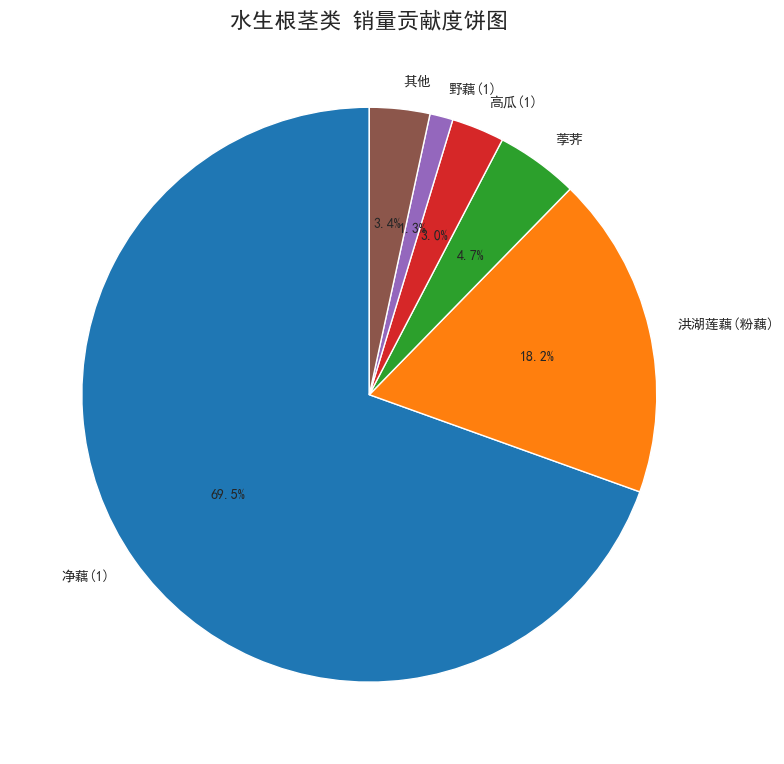

已生成 水生根茎类 品类销量贡献度饼图。


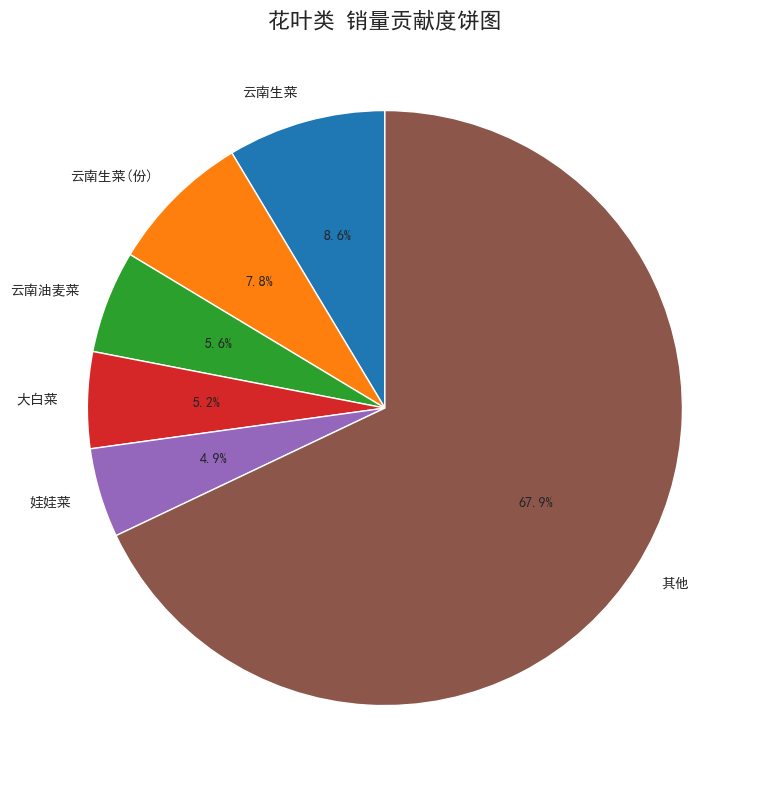

已生成 花叶类 品类销量贡献度饼图。


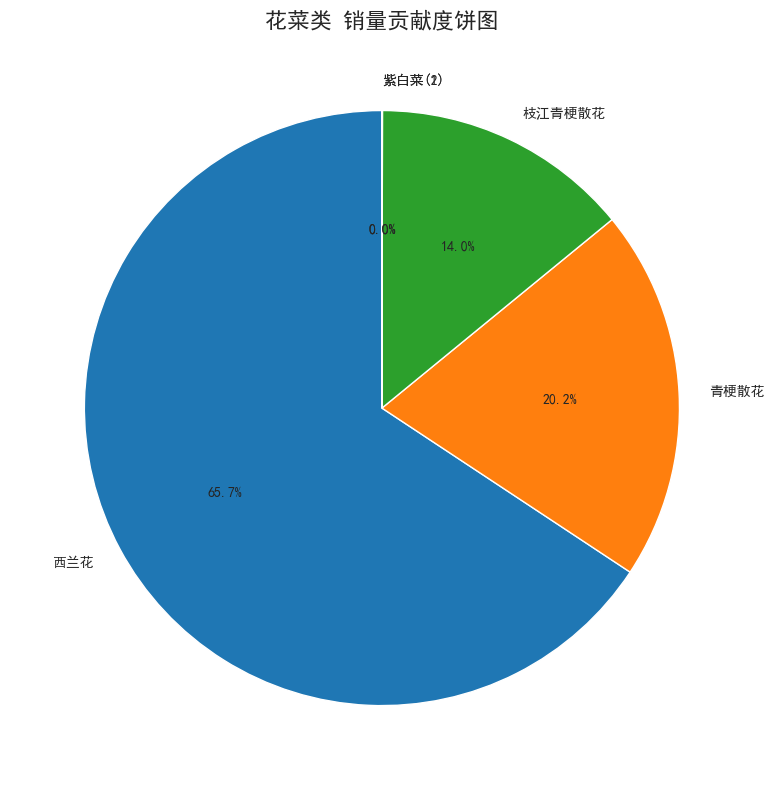

已生成 花菜类 品类销量贡献度饼图。


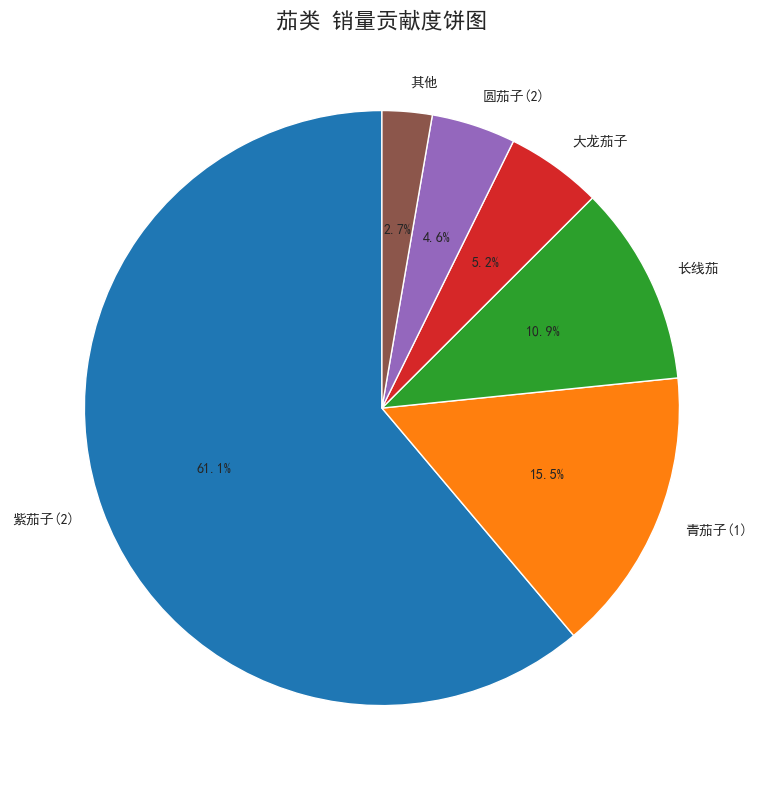

已生成 茄类 品类销量贡献度饼图。


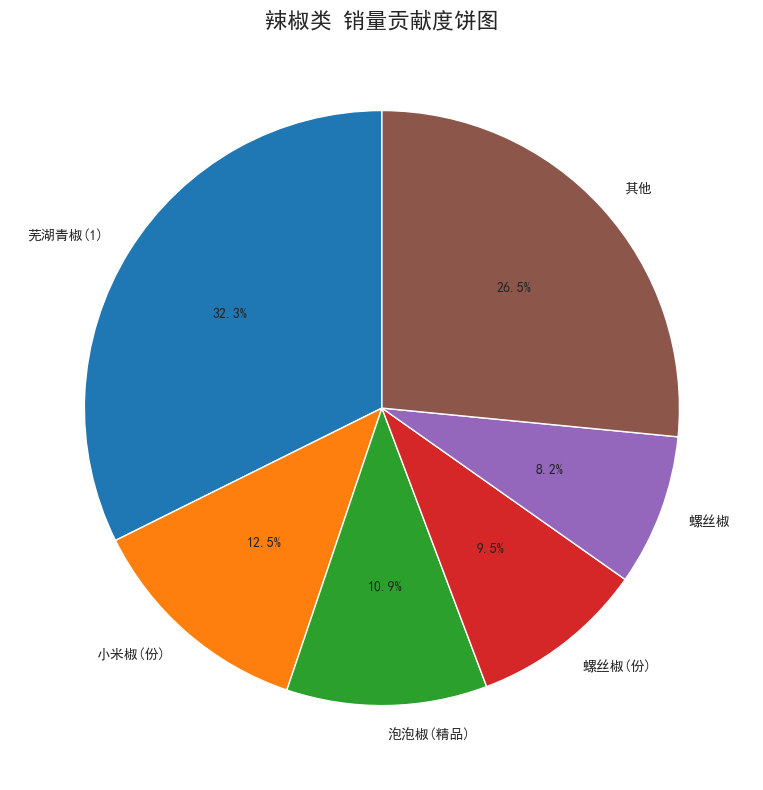

已生成 辣椒类 品类销量贡献度饼图。


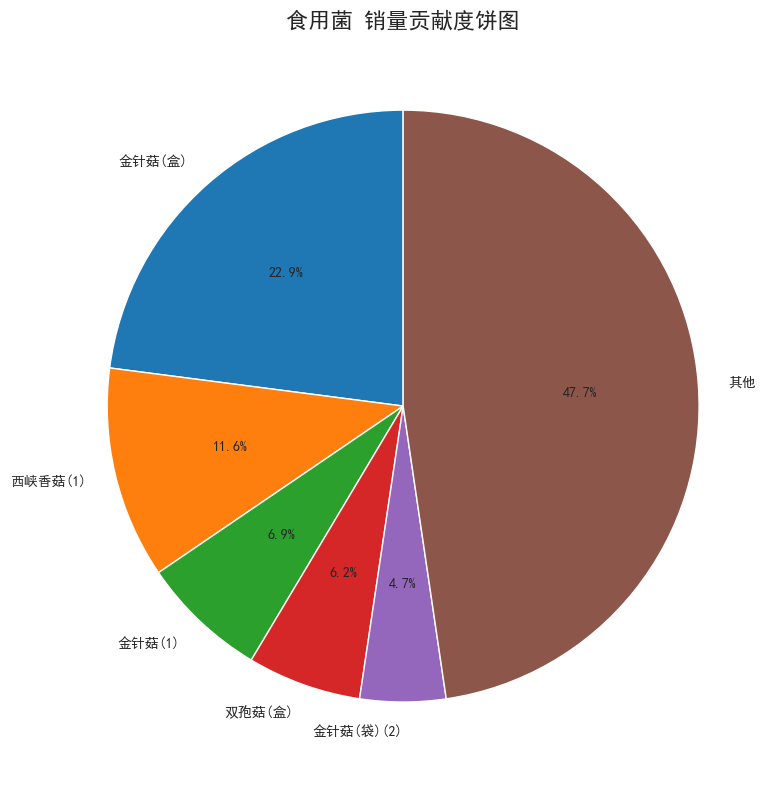

已生成 食用菌 品类销量贡献度饼图。


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据整合：合并单品名称

try:
    # 加载附件1，其中包含单品名称信息
    df_attachment1 = pd.read_excel('附件1.xlsx')
    print("附件1数据加载成功！")
    
    # 加载整合后的销售流水数据
    df_merged = pd.read_excel('含品类的销售流水明细.xlsx')
    print("整合后的数据加载成功！")

except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 确保 '单品编码' 列数据类型一致，便于合并
df_attachment1['单品编码'] = df_attachment1['单品编码'].astype(str)
df_merged['单品编码'] = df_merged['单品编码'].astype(str)

# 确保 '销售日期' 列为日期类型
df_merged['销售日期'] = pd.to_datetime(df_merged['销售日期'])

# 再次合并数据，加入'单品名称'列。注意这里我们使用 '单品名称'
df_final_merged = pd.merge(
    df_merged,
    df_attachment1[['单品编码', '单品名称']],
    on='单品编码',
    how='left'
)

# 查看合并后的数据前5行，验证'单品名称'列是否成功添加
print("\n最终合并后的数据前5行：")
print(df_final_merged.head())
print("-" * 50)


# 2. 单品对品类贡献度分析（优化版）

# 计算每个品类的总销量
df_category_total_sales = df_final_merged.groupby('分类名称')['销量(千克)'].sum().reset_index()
df_category_total_sales = df_category_total_sales.rename(columns={'销量(千克)': '品类总销量'})

# 计算每个单品的总销量，并合并品类总销量
# 注意这里我们使用 '单品名称'
df_item_sales_contribution = df_final_merged.groupby(['分类名称', '单品编码', '单品名称'])['销量(千克)'].sum().reset_index()
df_item_sales_contribution = pd.merge(df_item_sales_contribution, df_category_total_sales, on='分类名称', how='left')

# 计算贡献度
df_item_sales_contribution['贡献度(%)'] = (df_item_sales_contribution['销量(千克)'] / df_item_sales_contribution['品类总销量']) * 100

# 按照贡献度降序排列
df_item_sales_contribution = df_item_sales_contribution.sort_values(by=['分类名称', '贡献度(%)'], ascending=[True, False])

# 保存这个贡献度分析结果，方便查阅
df_item_sales_contribution.to_excel('各单品销量贡献度分析.xlsx', index=False)
print("各单品销量贡献度分析结果已保存到 '各单品销量贡献度分析.xlsx' 文件。")
print("-" * 50)


# 3. 可视化分析：为每个品类生成饼图

# 获取所有品类名称
categories = df_item_sales_contribution['分类名称'].unique()

for category in categories:
    df_category = df_item_sales_contribution[df_item_sales_contribution['分类名称'] == category].copy()

    # 获取前5个销量最大的单品
    df_top5_items = df_category.head(5)
    
    # 如果品类下的单品超过5个，将剩下的合并为“其他”
    if len(df_category) > 5:
        other_contribution = df_category.iloc[5:]['贡献度(%)'].sum()
        df_other = pd.DataFrame([['其他', other_contribution]], columns=['单品名称', '贡献度(%)'])
        df_top5_items = pd.concat([df_top5_items[['单品名称', '贡献度(%)']], df_other], ignore_index=True)
    
    # 绘制饼图
    plt.figure(figsize=(8, 8))
    plt.pie(df_top5_items['贡献度(%)'], labels=df_top5_items['单品名称'], autopct='%1.1f%%', startangle=90)
    plt.title(f'{category} 销量贡献度饼图', fontsize=16)
    plt.tight_layout()
    plt.show()
    print(f"已生成 {category} 品类销量贡献度饼图。")

数据加载成功！

根据累计贡献度动态选取的核心单品：
  - 水生根茎类: 共 2 个核心单品，包括 净藕(1), 洪湖莲藕(粉藕)...
  - 花叶类: 共 25 个核心单品，包括 云南生菜, 云南生菜(份), 云南油麦菜, 大白菜, 娃娃菜...
  - 花菜类: 共 2 个核心单品，包括 西兰花, 青梗散花...
  - 茄类: 共 3 个核心单品，包括 紫茄子(2), 青茄子(1), 长线茄...
  - 辣椒类: 共 10 个核心单品，包括 芜湖青椒(1), 小米椒(份), 泡泡椒(精品), 螺丝椒(份), 螺丝椒...
  - 食用菌: 共 19 个核心单品，包括 金针菇(盒), 西峡香菇(1), 金针菇(1), 双孢菇(盒), 金针菇(袋)(2)...
--------------------------------------------------

开始绘制 水生根茎类 的月度销量图...


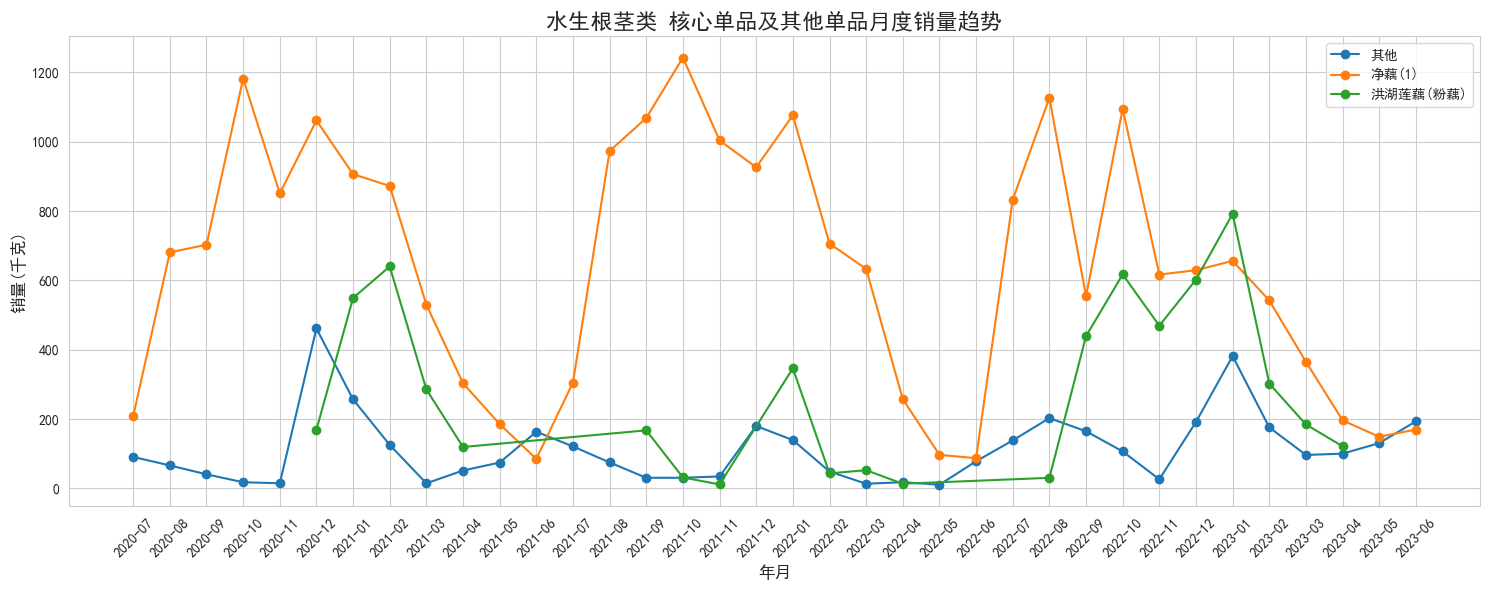


开始绘制 花叶类 的月度销量图...


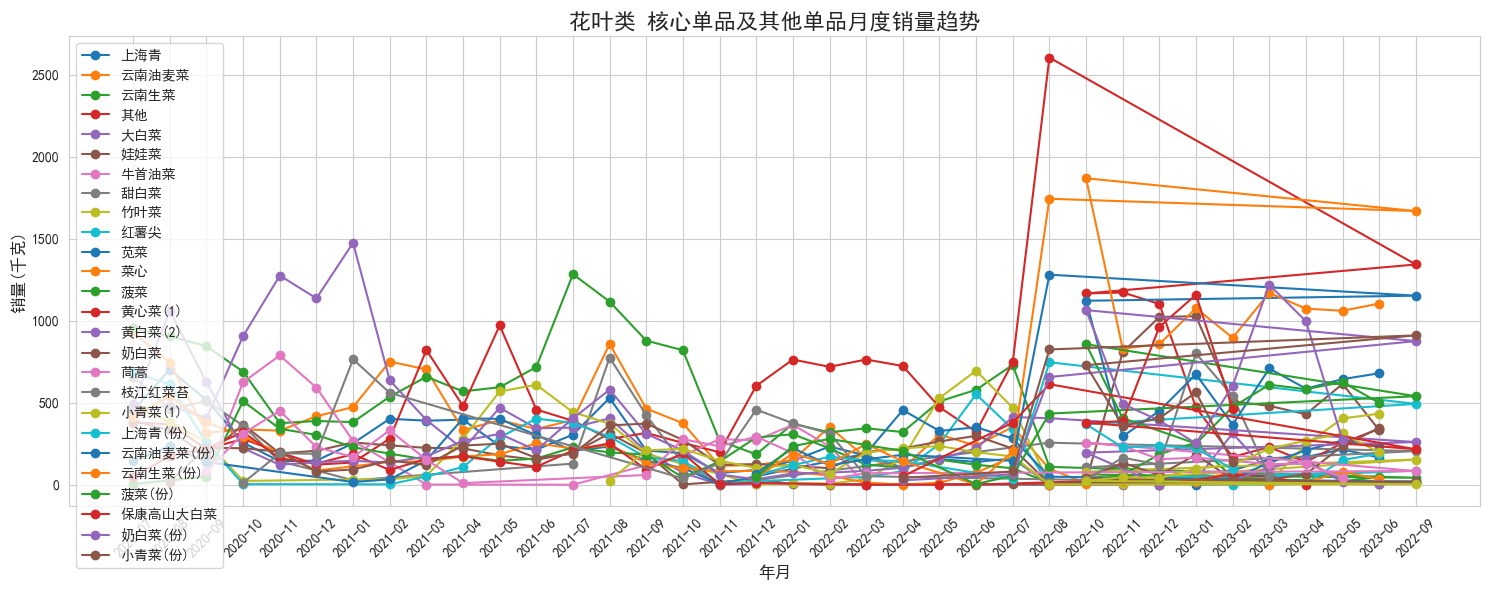


开始绘制 花菜类 的月度销量图...


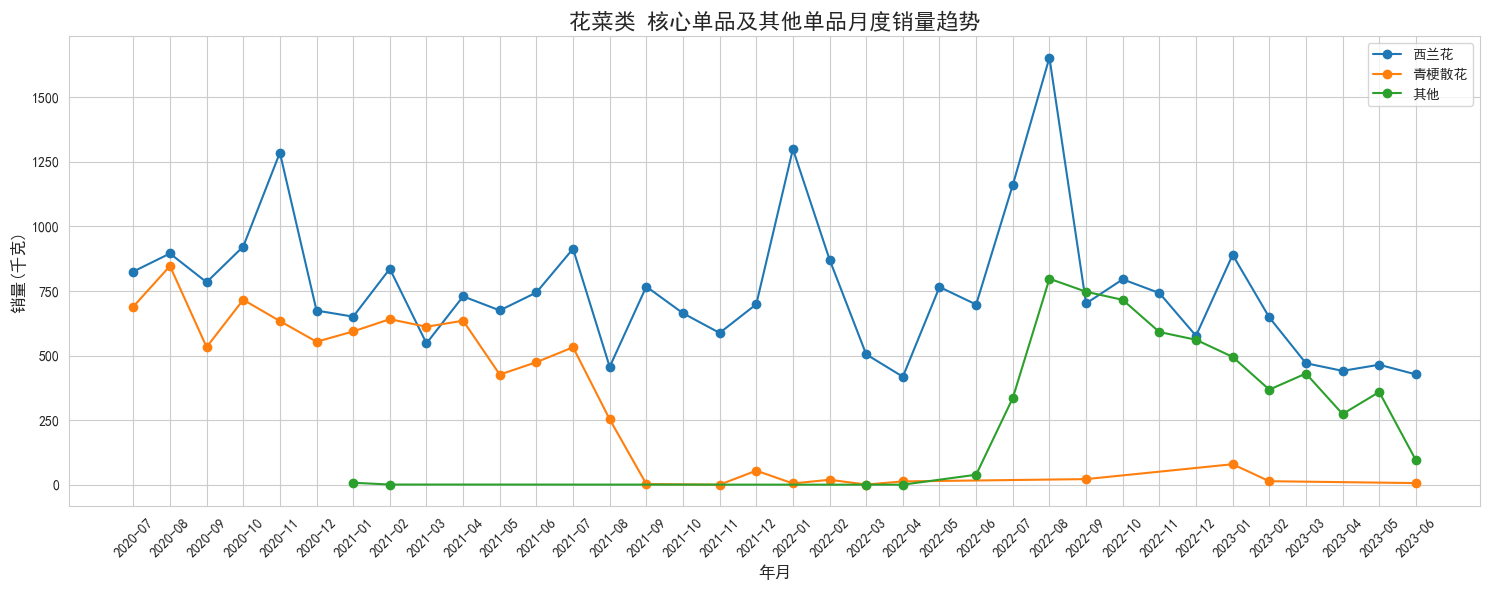


开始绘制 茄类 的月度销量图...


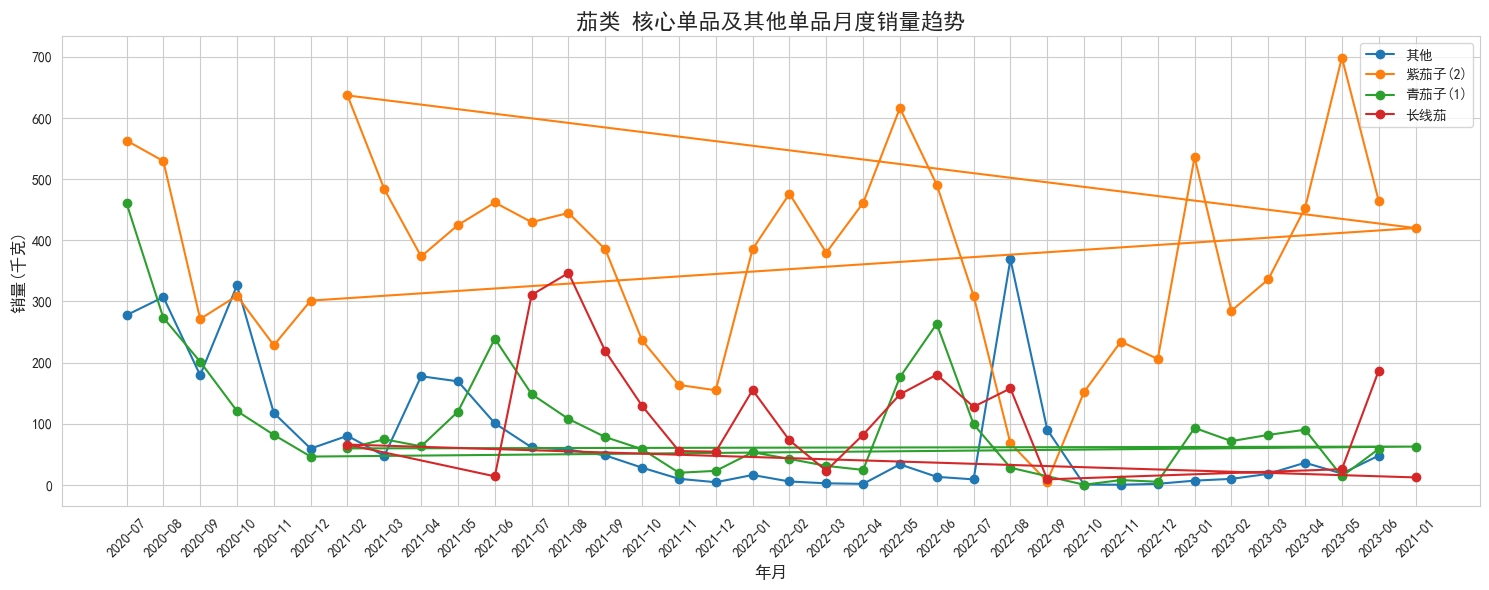


开始绘制 辣椒类 的月度销量图...


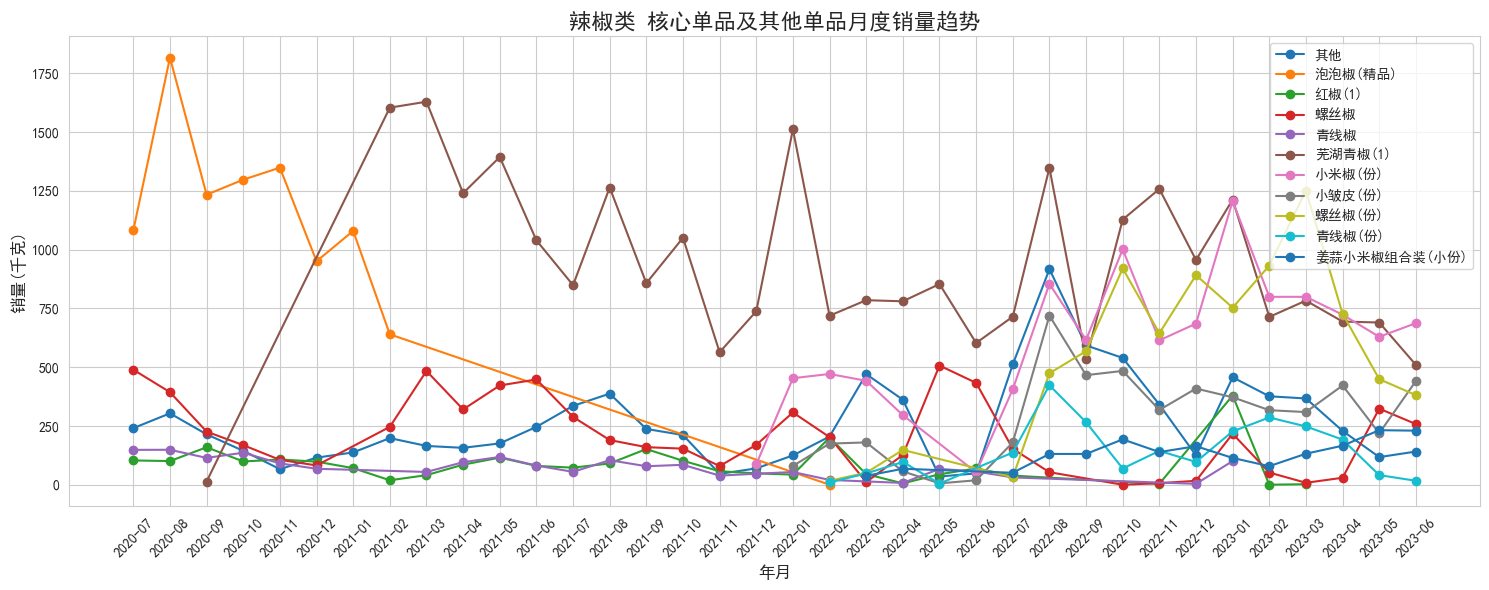


开始绘制 食用菌 的月度销量图...


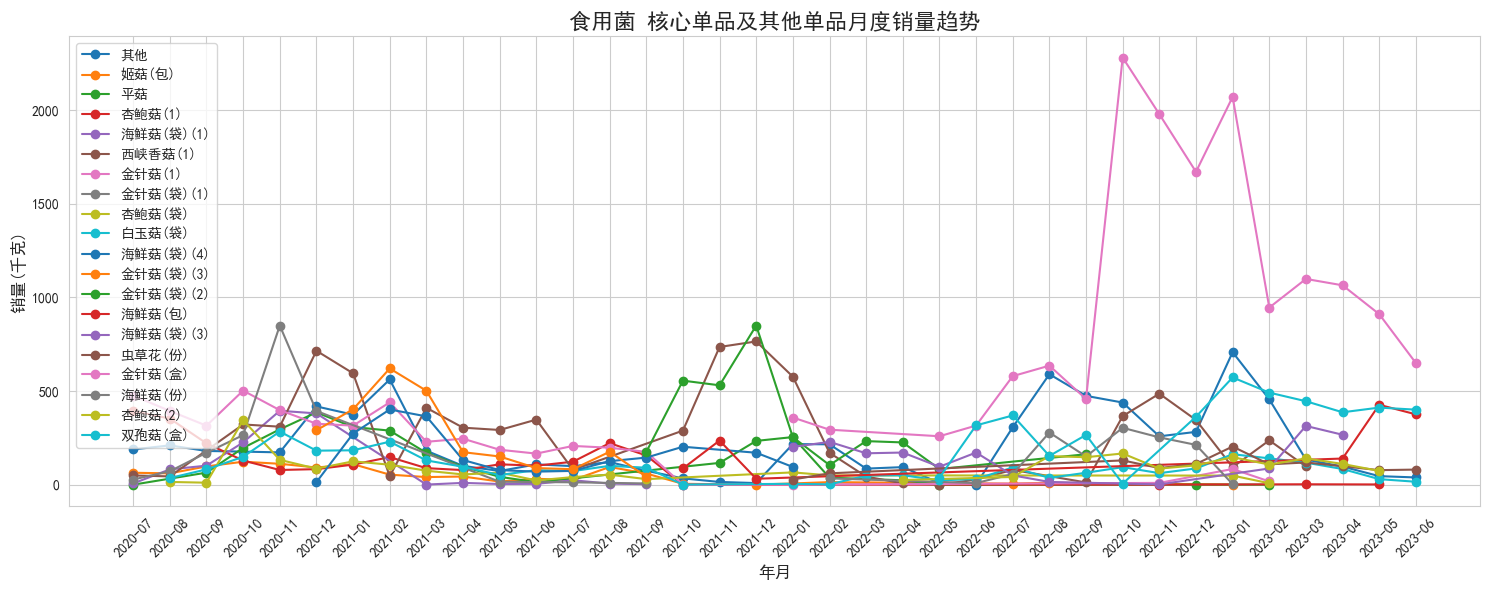


所有品类的月度销量图已生成。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取数据
try:
    # 加载整合后的销售流水数据（包含单品名称）
    df_merged_with_name = pd.read_excel('含品类的销售流水明细.xlsx')
    df_attachment1 = pd.read_excel('附件1.xlsx')
    
    # 确保 '单品编码' 列数据类型一致，便于合并
    df_attachment1['单品编码'] = df_attachment1['单品编码'].astype(str)
    df_merged_with_name['单品编码'] = df_merged_with_name['单品编码'].astype(str)
    
    # 合并数据，加入'单品名称'列
    df_merged_with_name = pd.merge(df_merged_with_name, df_attachment1[['单品编码', '单品名称']], on='单品编码', how='left')
    df_merged_with_name['销售日期'] = pd.to_datetime(df_merged_with_name['销售日期'])
    
    # 加载贡献度分析结果（用于动态选择核心单品）
    df_contribution = pd.read_excel('各单品销量贡献度分析.xlsx')

    print("数据加载成功！")

except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 2. 动态选取核心单品
def get_core_items(contribution_df, cumulative_threshold=0.9):
    """根据累计贡献度阈值动态选取核心单品"""
    core_items = {}
    categories = contribution_df['分类名称'].unique()
    
    for category in categories:
        df_category = contribution_df[contribution_df['分类名称'] == category].sort_values(by='贡献度(%)', ascending=False)
        df_category['累计贡献度(%)'] = df_category['贡献度(%)'].cumsum()
        
        # 选取累计贡献度达到阈值的所有单品
        items = df_category[df_category['累计贡献度(%)'] <= cumulative_threshold * 100]['单品名称'].tolist()
        
        # 如果没有单品，则至少选取销量最高的1个
        if not items:
            items = [df_category.iloc[0]['单品名称']]
        
        core_items[category] = items
        
    return core_items

# 设定累计贡献度阈值为90%
core_items_to_analyze = get_core_items(df_contribution, cumulative_threshold=0.9)

print("\n根据累计贡献度动态选取的核心单品：")
for category, items in core_items_to_analyze.items():
    print(f"  - {category}: 共 {len(items)} 个核心单品，包括 {', '.join(items[:5])}...")
print("-" * 50)


# 3. 数据聚合：按年月和单品名称计算月度销量
df_merged_with_name['年月'] = df_merged_with_name['销售日期'].dt.to_period('M')

# 按年月、分类名称和单品名称进行聚合
df_monthly_sales = df_merged_with_name.groupby(['年月', '分类名称', '单品名称'])['销量(千克)'].sum().reset_index()

# 4. 可视化：为每个品类绘制月度销量折线图

for category, core_items in core_items_to_analyze.items():
    print(f"\n开始绘制 {category} 的月度销量图...")
    
    df_category = df_monthly_sales[df_monthly_sales['分类名称'] == category].copy()
    
    # 将长尾单品整合为“其他”
    df_category['单品名称_整合'] = df_category['单品名称'].apply(lambda x: x if x in core_items else '其他')
    
    # 按年月和整合后的名称进行聚合
    df_monthly_sales_agg = df_category.groupby(['年月', '单品名称_整合'])['销量(千克)'].sum().reset_index()
    
    # 绘制折线图
    plt.figure(figsize=(15, 6))
    
    # 获取整合后的单品列表
    unique_items = df_monthly_sales_agg['单品名称_整合'].unique()
    
    for item in unique_items:
        df_item = df_monthly_sales_agg[df_monthly_sales_agg['单品名称_整合'] == item]
        plt.plot(df_item['年月'].astype(str), df_item['销量(千克)'], label=item, marker='o')
    
    plt.title(f'{category} 核心单品及其他单品月度销量趋势', fontsize=16)
    plt.xlabel('年月', fontsize=12)
    plt.ylabel('销量(千克)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\n所有品类的月度销量图已生成。")

数据加载成功！

根据累计贡献度动态选取的核心单品：
共 61 个核心单品，包括 青线椒, 平菇, 海鲜菇(袋)(4), 金针菇(袋)(3), 西峡香菇(1), 苋菜, 青茄子(1), 保康高山大白菜, 小皱皮(份), 上海青...
--------------------------------------------------
每日核心单品总销量数据（前5行）：
单品名称           上海青  上海青(份)   云南油麦菜  云南油麦菜(份)    云南生菜  云南生菜(份)  保康高山大白菜  净藕(1)  \
销售日期                                                                            
2020-07-01  11.476     0.0  32.579       0.0  41.966      0.0      0.0    0.0   
2020-07-02   6.806     0.0  27.056       0.0  44.873      0.0      0.0    0.0   
2020-07-03  13.120     0.0  36.709       0.0  36.309      0.0      0.0    0.0   
2020-07-04  28.186     0.0  43.330       0.0  51.205      0.0      0.0    0.0   
2020-07-05  12.038     0.0  12.594       0.0  34.249      0.0      0.0    0.0   

单品名称        双孢菇(盒)     大白菜  ...  金针菇(袋)(1)  金针菇(袋)(2)  金针菇(袋)(3)  长线茄    青梗散花  \
销售日期                        ...                                                 
2020-07-01     0.0  14.748  ...        0.0        0.0        0.0  0.0  12.086   
202

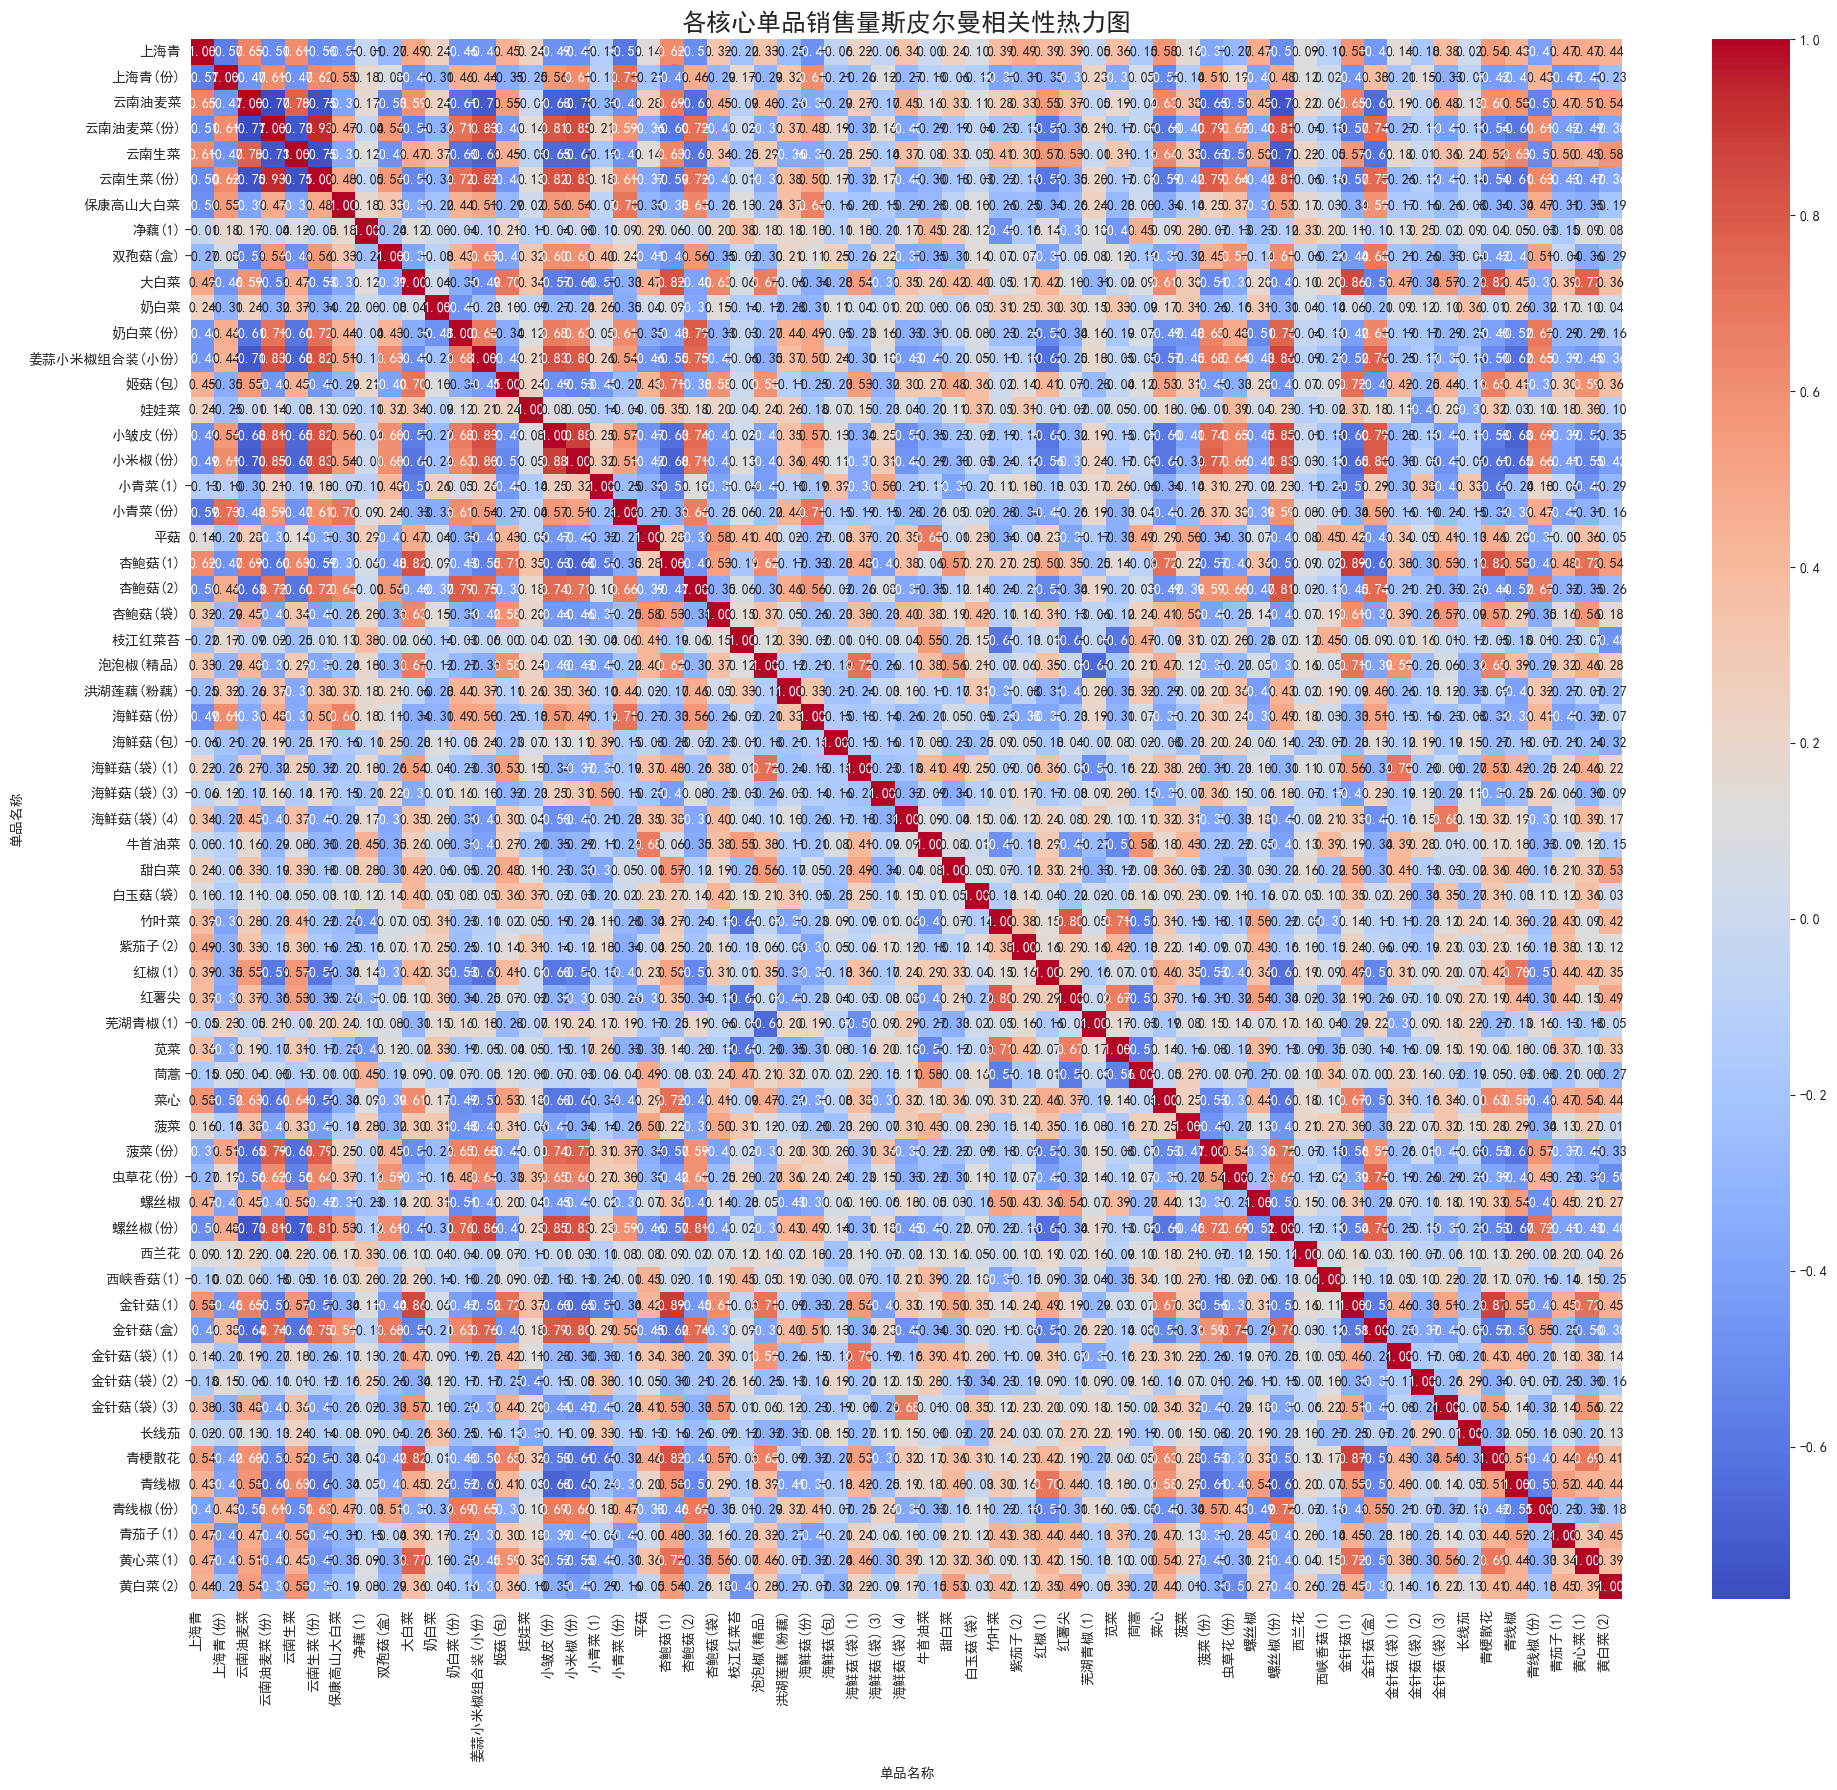

核心单品相关性热力图已生成。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取数据
try:
    # 加载整合后的销售流水数据（包含单品名称）
    df_merged_with_name = pd.read_excel('含品类的销售流水明细.xlsx')
    df_attachment1 = pd.read_excel('附件1.xlsx')
    
    # 确保 '单品编码' 列数据类型一致，便于合并
    df_attachment1['单品编码'] = df_attachment1['单品编码'].astype(str)
    df_merged_with_name['单品编码'] = df_merged_with_name['单品编码'].astype(str)
    
    # 合并数据，加入'单品名称'列
    df_merged_with_name = pd.merge(df_merged_with_name, df_attachment1[['单品编码', '单品名称']], on='单品编码', how='left')
    df_merged_with_name['销售日期'] = pd.to_datetime(df_merged_with_name['销售日期'])
    
    # 加载贡献度分析结果（用于动态选择核心单品）
    df_contribution = pd.read_excel('各单品销量贡献度分析.xlsx')

    print("数据加载成功！")

except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 2. 动态选取核心单品
def get_core_items(contribution_df, cumulative_threshold=0.9):
    """根据累计贡献度阈值动态选取核心单品"""
    core_items = []
    categories = contribution_df['分类名称'].unique()
    
    for category in categories:
        df_category = contribution_df[contribution_df['分类名称'] == category].sort_values(by='贡献度(%)', ascending=False)
        df_category['累计贡献度(%)'] = df_category['贡献度(%)'].cumsum()
        
        # 选取累计贡献度达到阈值的所有单品
        items = df_category[df_category['累计贡献度(%)'] <= cumulative_threshold * 100]['单品名称'].tolist()
        
        # 如果没有单品，则至少选取销量最高的1个
        if not items:
            items = [df_category.iloc[0]['单品名称']]
        
        core_items.extend(items)
        
    return list(set(core_items)) # 去重

# 设定累计贡献度阈值为90%
core_items_to_analyze = get_core_items(df_contribution, cumulative_threshold=0.9)

print("\n根据累计贡献度动态选取的核心单品：")
print(f"共 {len(core_items_to_analyze)} 个核心单品，包括 {', '.join(core_items_to_analyze[:10])}...")
print("-" * 50)


# 3. 数据聚合：按日期和单品名称计算每日销量
# 筛选出核心单品数据
df_core_items_sales = df_merged_with_name[df_merged_with_name['单品名称'].isin(core_items_to_analyze)].copy()

# 使用pivot_table将数据转换为宽格式
df_daily_sales = df_core_items_sales.pivot_table(
    index='销售日期',
    columns='单品名称',
    values='销量(千克)',
    aggfunc='sum'
).fillna(0) # 填充没有销量的日期为0

print("每日核心单品总销量数据（前5行）：")
print(df_daily_sales.head())
print("-" * 50)


# 4. 相关性分析与可视化
# 计算斯皮尔曼相关性矩阵
correlation_matrix_spearman = df_daily_sales.corr(method='spearman')

print("各核心单品销售量斯皮尔曼相关性矩阵：")
print(correlation_matrix_spearman)
print("-" * 50)

# 绘制相关性热力图
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('各核心单品销售量斯皮尔曼相关性热力图', fontsize=18)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("核心单品相关性热力图已生成。")

数据加载成功！

根据累计贡献度动态选取的核心单品（按品类分组）：
  - 水生根茎类: 共 2 个核心单品
  - 花叶类: 共 25 个核心单品
  - 花菜类: 共 2 个核心单品
  - 茄类: 共 3 个核心单品
  - 辣椒类: 共 10 个核心单品
  - 食用菌: 共 19 个核心单品
--------------------------------------------------

开始绘制 水生根茎类 内部核心单品相关性热力图...


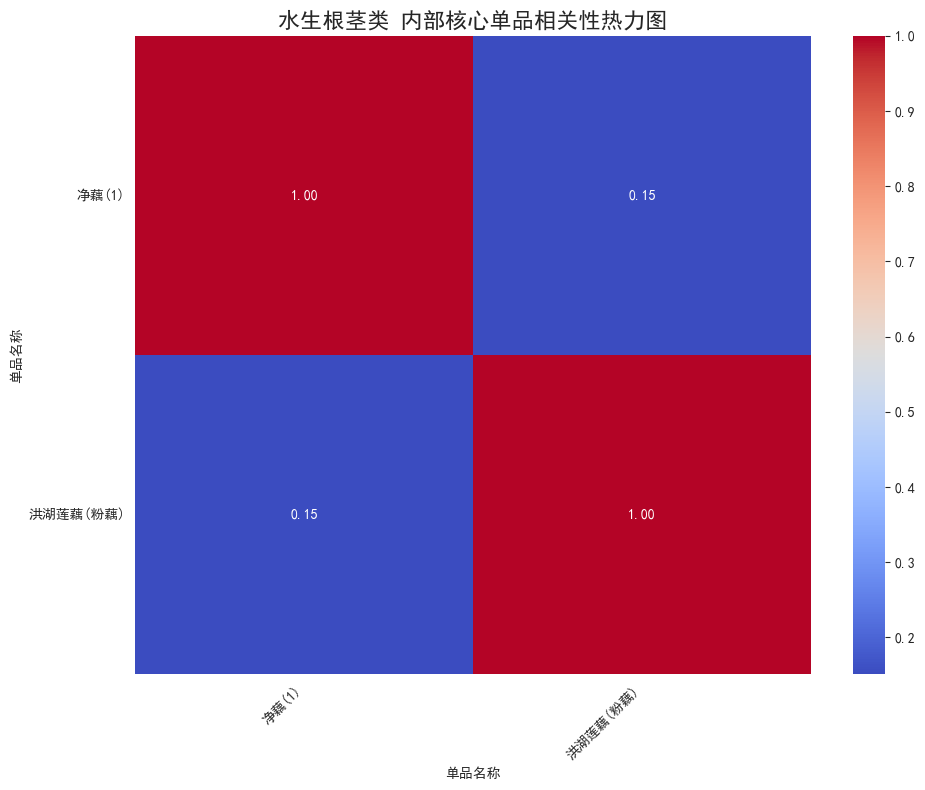


开始绘制 花叶类 内部核心单品相关性热力图...


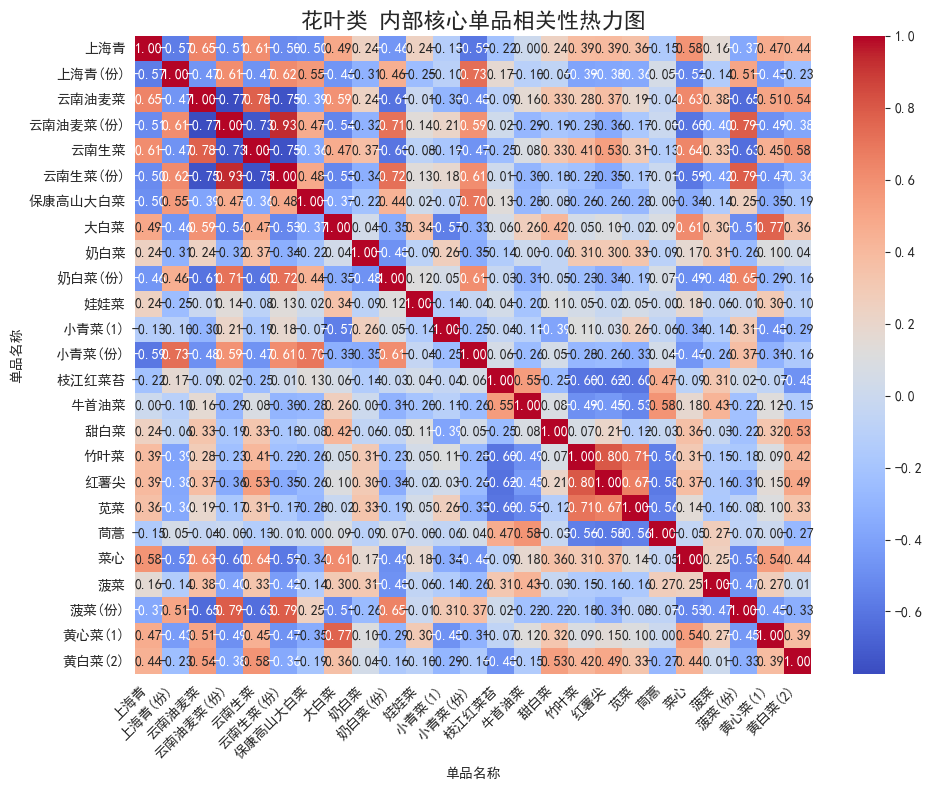


开始绘制 花菜类 内部核心单品相关性热力图...


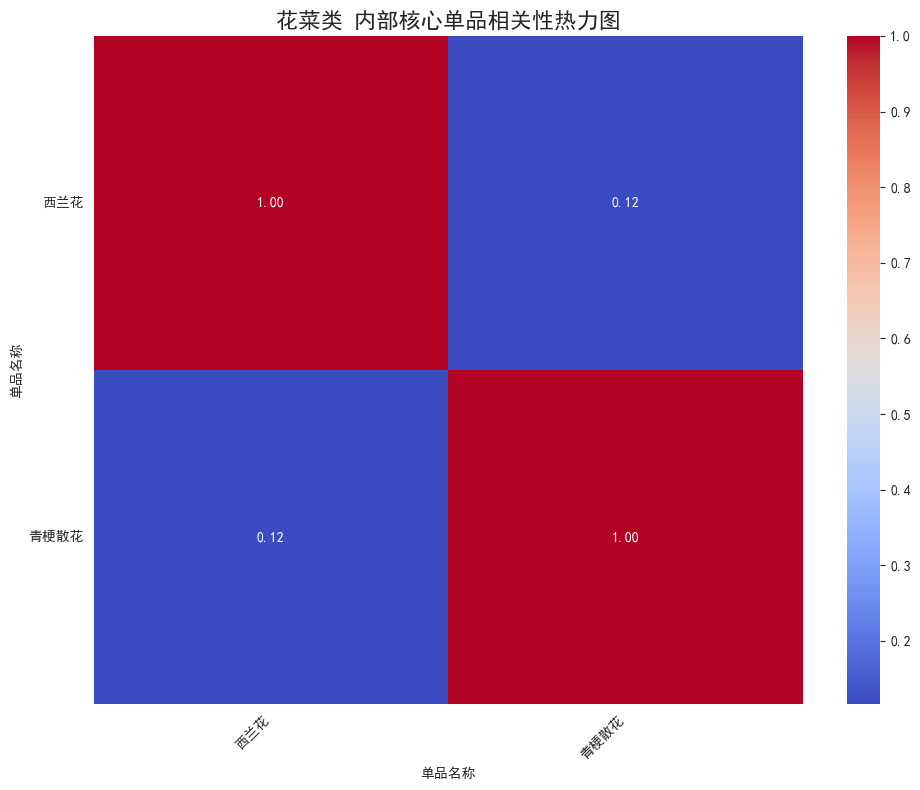


开始绘制 茄类 内部核心单品相关性热力图...


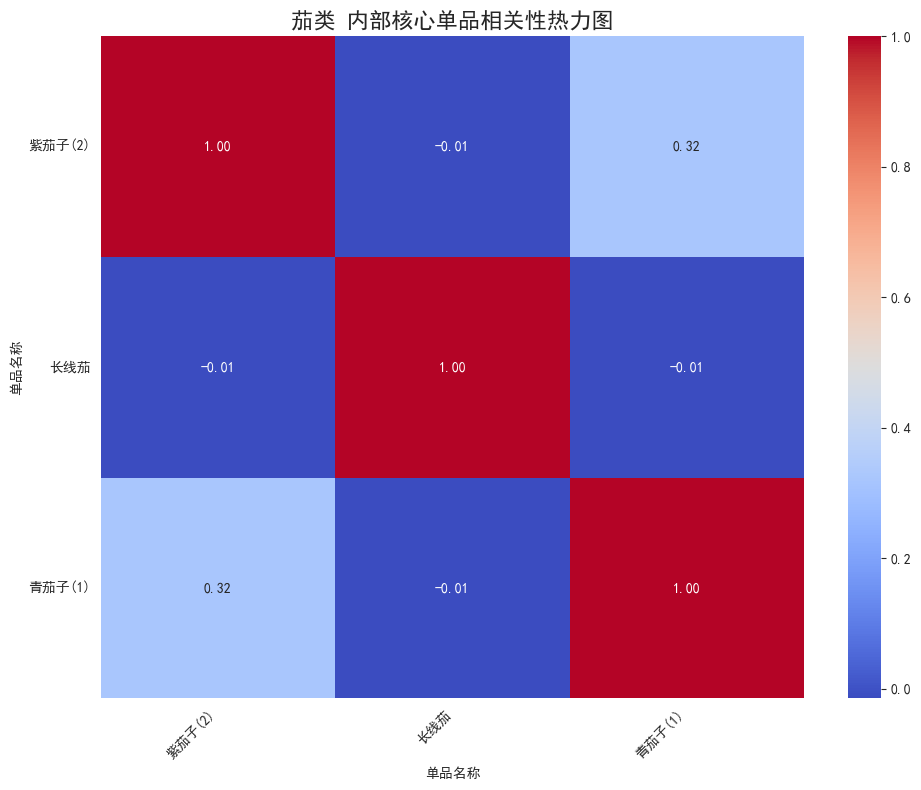


开始绘制 辣椒类 内部核心单品相关性热力图...


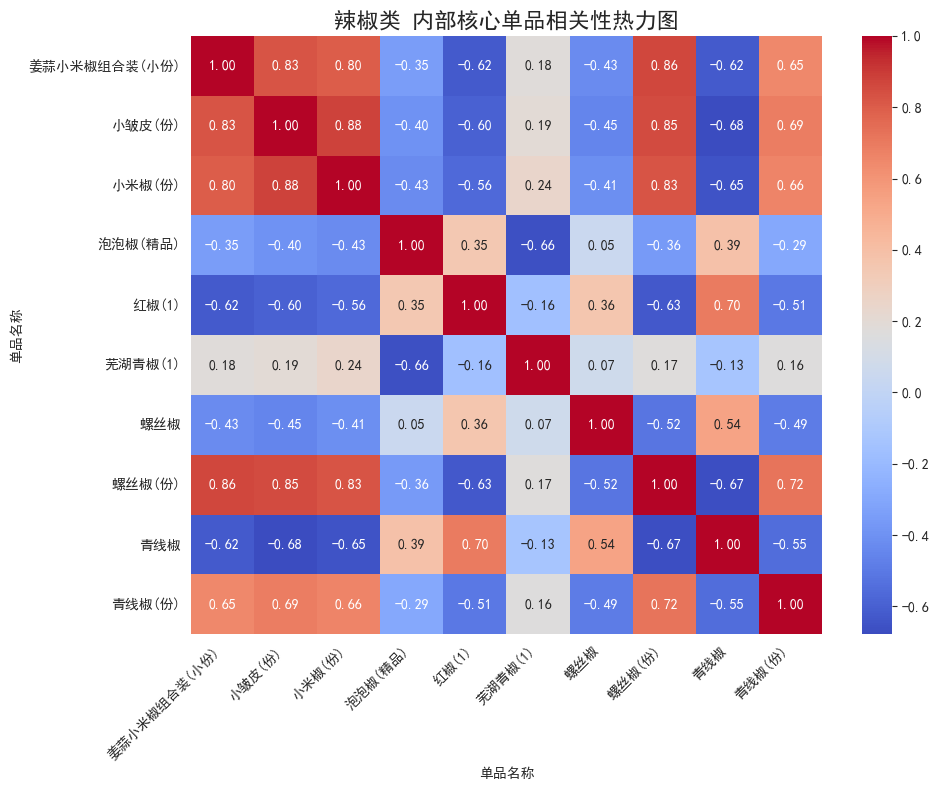


开始绘制 食用菌 内部核心单品相关性热力图...


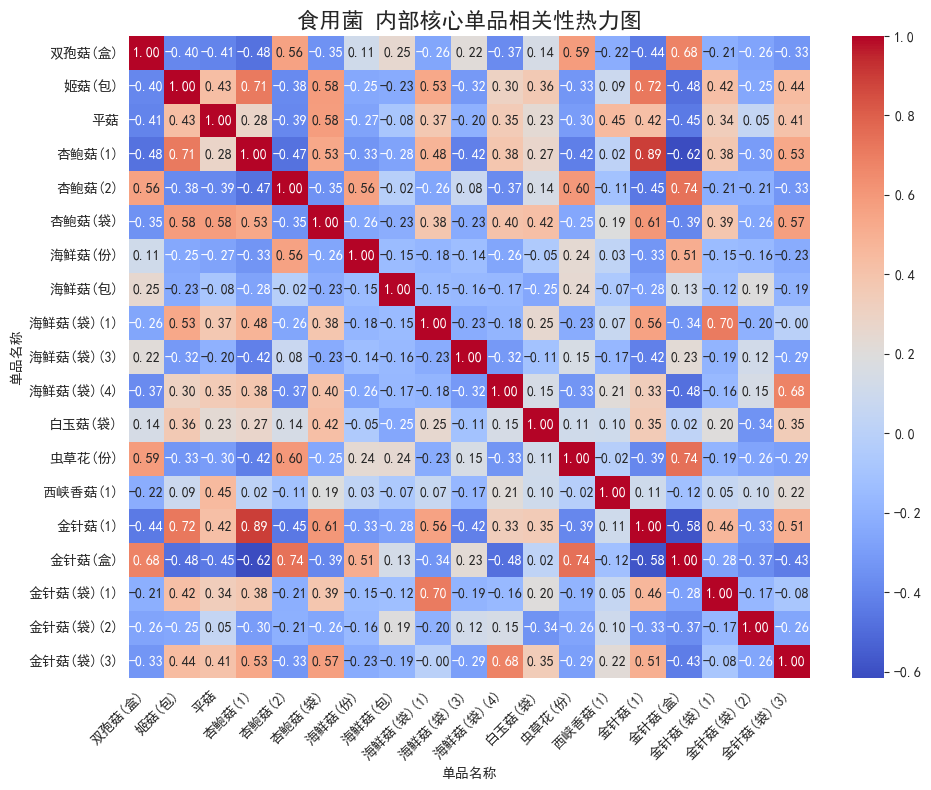


开始绘制 水生根茎类 与 食用菌 跨品类单品相关性热力图...


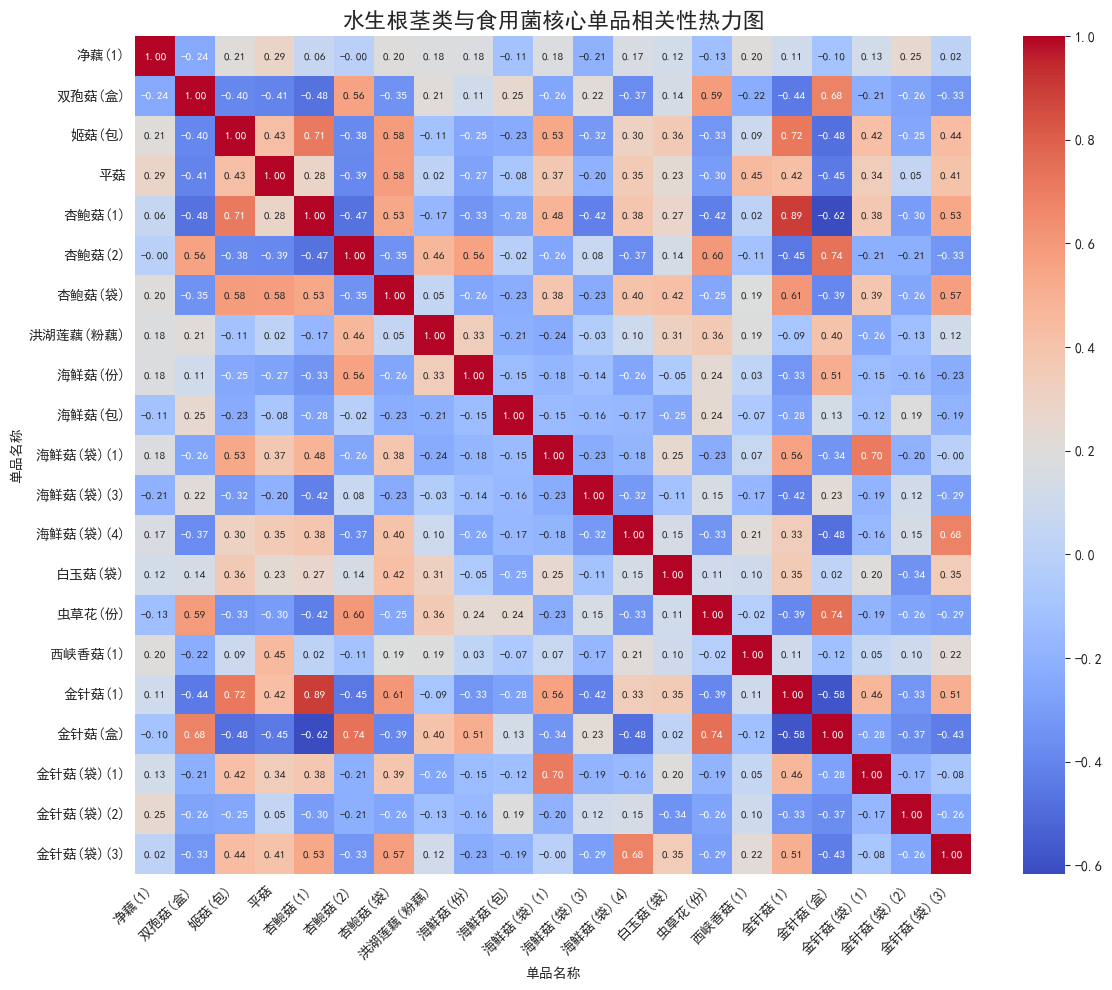


所有单品相关性热力图已生成。


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取数据
try:
    # 加载整合后的销售流水数据（包含单品名称）
    df_merged_with_name = pd.read_excel('含品类的销售流水明细.xlsx')
    df_attachment1 = pd.read_excel('附件1.xlsx')
    
    # 确保 '单品编码' 列数据类型一致，便于合并
    df_attachment1['单品编码'] = df_attachment1['单品编码'].astype(str)
    df_merged_with_name['单品编码'] = df_merged_with_name['单品编码'].astype(str)
    
    # 合并数据，加入'单品名称'列
    df_merged_with_name = pd.merge(df_merged_with_name, df_attachment1[['单品编码', '单品名称', '分类名称']], on='单品编码', how='left')
    df_merged_with_name['销售日期'] = pd.to_datetime(df_merged_with_name['销售日期'])
    
    # 加载贡献度分析结果（用于动态选择核心单品）
    df_contribution = pd.read_excel('各单品销量贡献度分析.xlsx')

    print("数据加载成功！")

except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 2. 动态选取核心单品
def get_core_items_by_category(contribution_df, cumulative_threshold=0.9):
    """根据累计贡献度阈值动态选取核心单品，并按品类返回字典"""
    core_items_by_category = {}
    categories = contribution_df['分类名称'].unique()
    
    for category in categories:
        df_category = contribution_df[contribution_df['分类名称'] == category].sort_values(by='贡献度(%)', ascending=False)
        df_category['累计贡献度(%)'] = df_category['贡献度(%)'].cumsum()
        
        items = df_category[df_category['累计贡献度(%)'] <= cumulative_threshold * 100]['单品名称'].tolist()
        
        if not items:
            items = [df_category.iloc[0]['单品名称']]
        
        core_items_by_category[category] = items
        
    return core_items_by_category

core_items_by_category = get_core_items_by_category(df_contribution, cumulative_threshold=0.9)

print("\n根据累计贡献度动态选取的核心单品（按品类分组）：")
for category, items in core_items_by_category.items():
    print(f"  - {category}: 共 {len(items)} 个核心单品")
print("-" * 50)


# 3. 按品类分组绘制热力图

for category, items in core_items_by_category.items():
    if len(items) > 1: # 只有单品数量多于1个时才绘制热力图
        print(f"\n开始绘制 {category} 内部核心单品相关性热力图...")
        
        # 筛选出当前品类核心单品数据
        df_category_sales = df_merged_with_name[df_merged_with_name['单品名称'].isin(items)].copy()
        
        # 聚合为每日销量
        df_daily_sales = df_category_sales.pivot_table(
            index='销售日期',
            columns='单品名称',
            values='销量(千克)',
            aggfunc='sum'
        ).fillna(0)
        
        # 计算斯皮尔曼相关性矩阵
        correlation_matrix = df_daily_sales.corr(method='spearman')
        
        # 绘制热力图
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                    annot_kws={"size": 10})
        plt.title(f'{category} 内部核心单品相关性热力图', fontsize=16)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

# 4. 绘制跨品类热力图（水生根茎类与食用菌）
print("\n开始绘制 水生根茎类 与 食用菌 跨品类单品相关性热力图...")

# 选取两个品类的核心单品
items_to_plot = core_items_by_category['水生根茎类'] + core_items_by_category['食用菌']

# 筛选数据并聚合
df_cross_category_sales = df_merged_with_name[df_merged_with_name['单品名称'].isin(items_to_plot)].copy()
df_daily_sales_cross = df_cross_category_sales.pivot_table(
    index='销售日期',
    columns='单品名称',
    values='销量(千克)',
    aggfunc='sum'
).fillna(0)

# 计算相关性矩阵
correlation_matrix_cross = df_daily_sales_cross.corr(method='spearman')

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cross, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 8})
plt.title('水生根茎类与食用菌核心单品相关性热力图', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n所有单品相关性热力图已生成。")

数据加载成功！

开始绘制 花叶类 内部核心单品相关性热力图（优化版）...


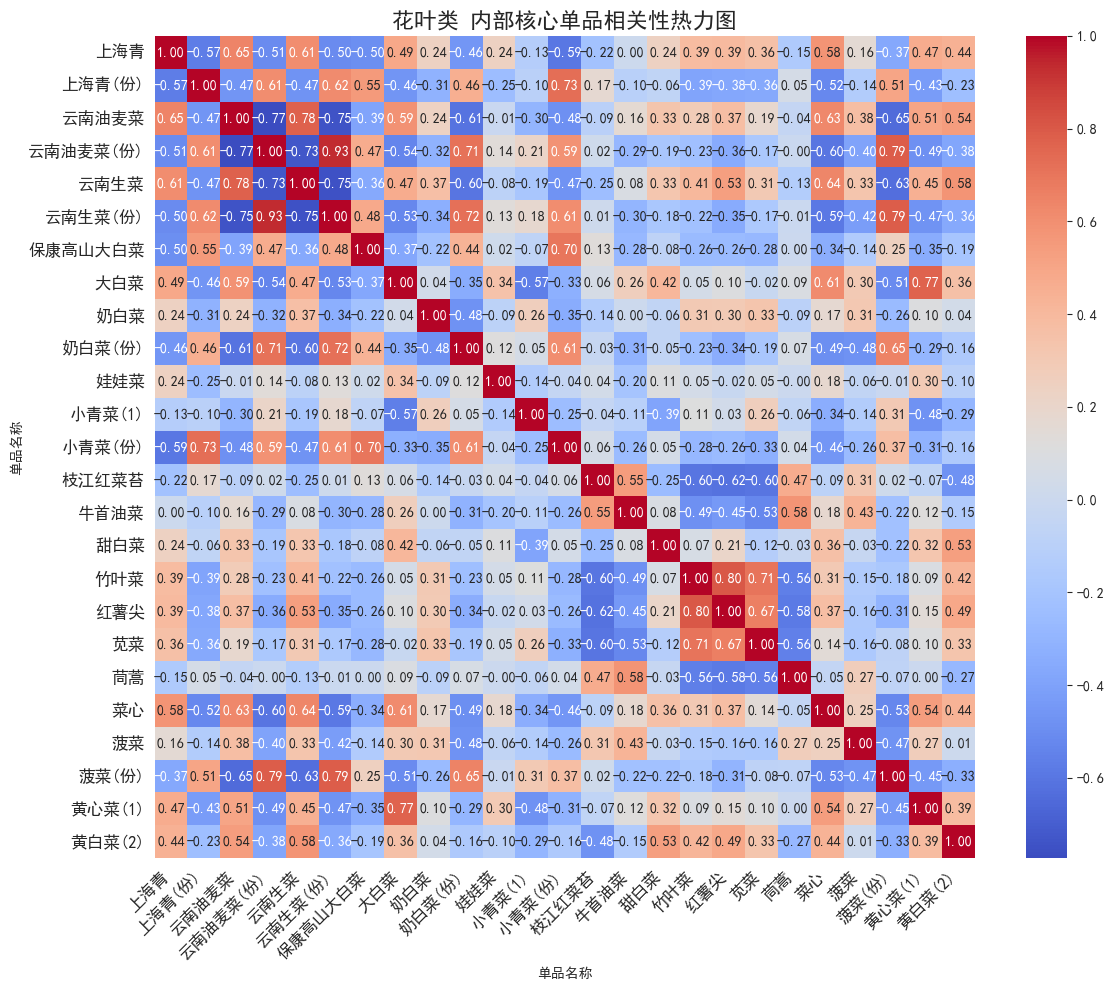


花叶类内部核心单品相关性热力图（优化版）已生成。


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取数据
try:
    # 读取整合后的销售流水数据（包含单品编码和销量）
    df_merged = pd.read_excel('含品类的销售流水明细.xlsx')
    # 读取附件1，其中包含单品名称和分类名称
    df_attachment1 = pd.read_excel('附件1.xlsx')
    # 读取贡献度分析结果（用于动态选择核心单品）
    df_contribution = pd.read_excel('各单品销量贡献度分析.xlsx')

    # 确保 '单品编码' 列数据类型一致，便于合并
    df_attachment1['单品编码'] = df_attachment1['单品编码'].astype(str)
    df_merged['单品编码'] = df_merged['单品编码'].astype(str)

    # 核心修正：仅合并'单品名称'这一列，因为'分类名称'已存在于df_merged中
    df_merged_with_name = pd.merge(
        df_merged,
        df_attachment1[['单品编码', '单品名称']],
        on='单品编码',
        how='left'
    )
    df_merged_with_name['销售日期'] = pd.to_datetime(df_merged_with_name['销售日期'])
    print("数据加载成功！")

except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 辅助函数：根据累计贡献度动态选取核心单品
def get_core_items_by_category(contribution_df, cumulative_threshold=0.9):
    core_items_by_category = {}
    categories = contribution_df['分类名称'].unique()
    for category in categories:
        df_category = contribution_df[contribution_df['分类名称'] == category].sort_values(by='贡献度(%)', ascending=False)
        df_category['累计贡献度(%)'] = df_category['贡献度(%)'].cumsum()
        items = df_category[df_category['累计贡献度(%)'] <= cumulative_threshold * 100]['单品名称'].tolist()
        if not items:
            items = [df_category.iloc[0]['单品名称']]
        core_items_by_category[category] = items
    return core_items_by_category

# 2. 动态选取核心单品
core_items_by_category = get_core_items_by_category(df_contribution, cumulative_threshold=0.9)
# 获取花叶类的核心单品
items = core_items_by_category['花叶类']

# 3. 筛选数据并聚合
df_category_sales = df_merged_with_name[df_merged_with_name['单品名称'].isin(items)].copy()
df_daily_sales = df_category_sales.pivot_table(
    index='销售日期',
    columns='单品名称',
    values='销量(千克)',
    aggfunc='sum'
).fillna(0)

# 4. 计算斯皮尔曼相关性矩阵
correlation_matrix = df_daily_sales.corr(method='spearman')

# 5. 绘制优化版热力图
print(f"\n开始绘制 花叶类 内部核心单品相关性热力图（优化版）...")
plt.figure(figsize=(12, 10)) # 调整图表尺寸，提供更多空间
sns.heatmap(
    correlation_matrix,
    annot=True,          # 显示相关系数
    cmap='coolwarm',     # 颜色映射
    fmt=".2f",           # 小数位数
    annot_kws={"size": 10} # 调整相关系数数字的字体大小
)
plt.title(f'花叶类 内部核心单品相关性热力图', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

print("\n花叶类内部核心单品相关性热力图（优化版）已生成。")

数据加载成功！

开始分析单品：云南生菜 的打折销售分布...


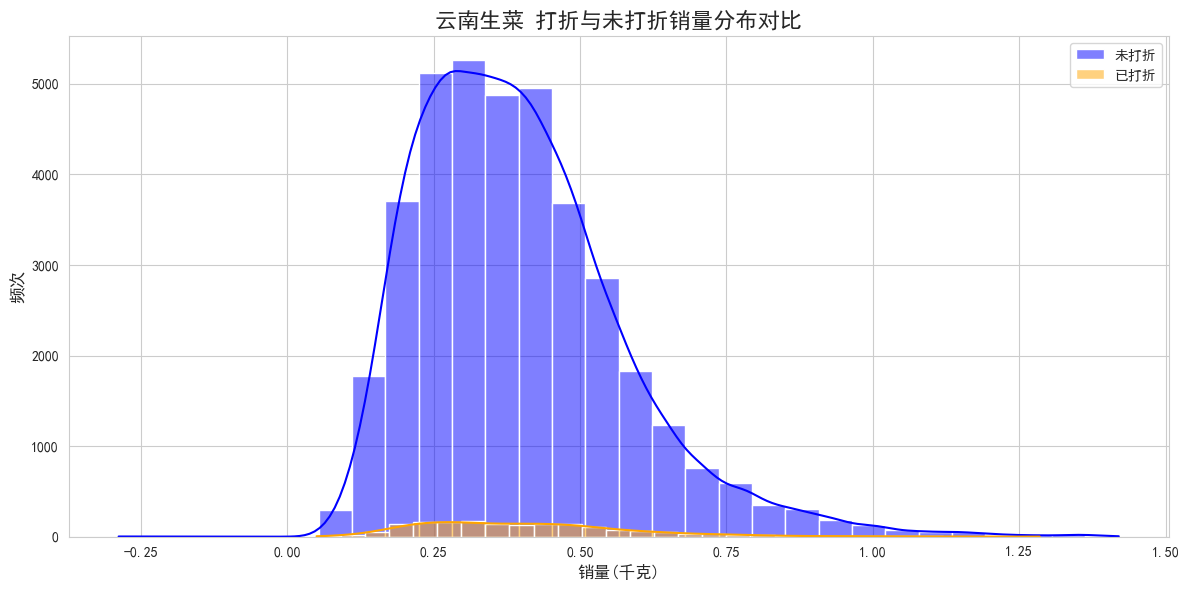

--- 云南生菜 销量统计 ---
未打折平均销量: 0.40 千克
已打折平均销量: 0.41 千克
--------------------------------------------------

开始分析单品：净藕(1) 的打折销售分布...


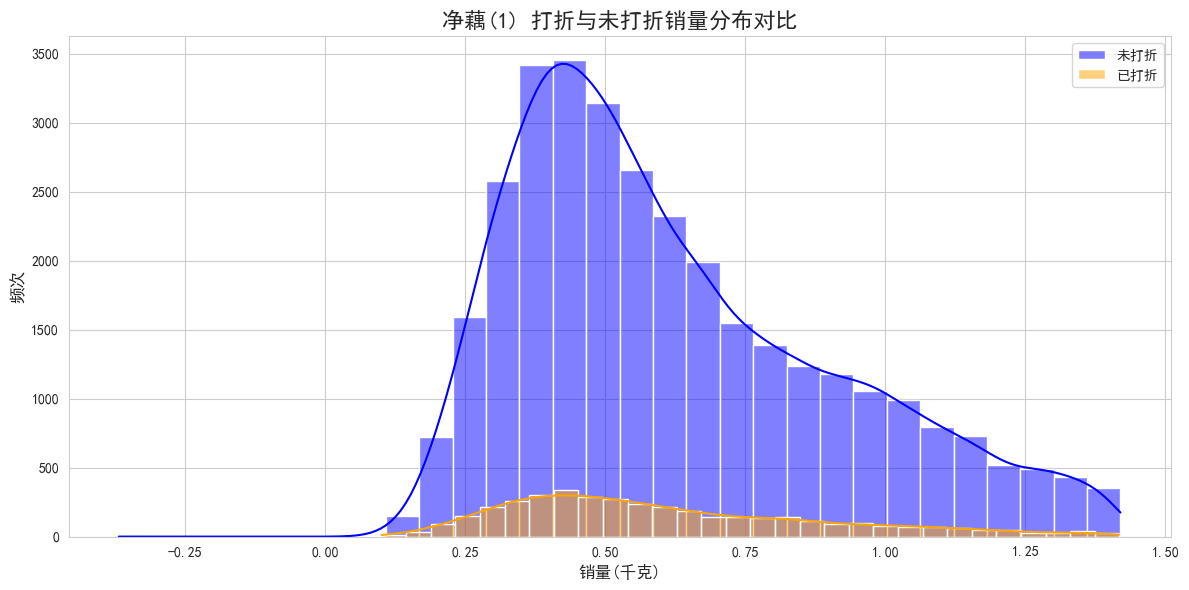

--- 净藕(1) 销量统计 ---
未打折平均销量: 0.62 千克
已打折平均销量: 0.61 千克
--------------------------------------------------

所有代表性单品的打折销售分布分析已完成。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号

# 1. 数据准备：读取数据（使用正确的文件名）
try:
    # 读取整合后的销售流水数据（包含单品编码和销量）
    df_merged = pd.read_excel('含品类的销售流水明细.xlsx')
    # 读取附件1，其中包含单品名称和分类名称
    df_attachment1 = pd.read_excel('附件1.xlsx')

    # 确保 '单品编码' 列数据类型一致，便于合并
    df_attachment1['单品编码'] = df_attachment1['单品编码'].astype(str)
    df_merged['单品编码'] = df_merged['单品编码'].astype(str)

    # 核心修正：仅合并'单品名称'这一列，因为'分类名称'已存在于df_merged中
    df_merged_with_name = pd.merge(
        df_merged,
        df_attachment1[['单品编码', '单品名称']],
        on='单品编码',
        how='left'
    )
    df_merged_with_name['销售日期'] = pd.to_datetime(df_merged_with_name['销售日期'])
    print("数据加载成功！")

except FileNotFoundError:
    print("文件未找到，请检查文件名和路径是否正确。")
    exit()

# 2. 选取代表性单品进行分析
items_to_analyze = ['云南生菜', '净藕(1)']

for item_name in items_to_analyze:
    print(f"\n开始分析单品：{item_name} 的打折销售分布...")

    # 筛选出当前单品的数据
    df_item = df_merged_with_name[df_merged_with_name['单品名称'] == item_name].copy()

    # 将数据分为打折和非打折两组
    df_discounted = df_item[df_item['是否打折销售'] == '是']['销量(千克)']
    df_non_discounted = df_item[df_item['是否打折销售'] == '否']['销量(千克)']

    # 绘制直方图进行对比
    plt.figure(figsize=(12, 6))

    # 绘制非打折销售的销量分布
    sns.histplot(df_non_discounted, bins=30, kde=True, label='未打折', color='blue')
    
    # 绘制打折销售的销量分布
    sns.histplot(df_discounted, bins=30, kde=True, label='已打折', color='orange')
    
    plt.title(f'{item_name} 打折与未打折销量分布对比', fontsize=16)
    plt.xlabel('销量(千克)', fontsize=12)
    plt.ylabel('频次', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 打印一些统计信息，以作补充
    print(f"--- {item_name} 销量统计 ---")
    print(f"未打折平均销量: {df_non_discounted.mean():.2f} 千克")
    print(f"已打折平均销量: {df_discounted.mean():.2f} 千克")
    print("-" * 50)


print("\n所有代表性单品的打折销售分布分析已完成。")